# Data import

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson
import altair as alt
import scipy.stats as stats

#alt.data_transformers.enable('vegafusion')

In [3]:
# from google.colab import drive
# drive.mount("/content/gdrive")
# seoulBike = pd.read_csv("gdrive/MyDrive/Data 583/SeoulBikeData.csv",encoding='ISO-8859-1')
# seoulBike.head()

seoulBike = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')
seoulBike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
seoulBike['Date'] = pd.to_datetime(seoulBike['Date'], format='%d/%m/%Y')
#seoulBike["Holiday"] = seoulBike["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
seoulBike['Month'] = seoulBike['Date'].dt.month
seoulBike['Seasons'] = pd.Categorical(seoulBike['Seasons'],
                                      categories=['Spring', 'Summer', 'Autumn', 'Winter'],
                                      ordered=True)
#seoulBike["Functioning Day"] = seoulBike["Functioning Day"].replace({'No': 0, 'Yes': 1})
def map_to_workday(day_of_week):
    if day_of_week < 5:
        return '1'
    else:
        return '0'

seoulBike['Weekday'] = seoulBike['Date'].dt.dayofweek
seoulBike['WorkdayOrNot'] = seoulBike['Date'].dt.dayofweek.apply(map_to_workday)
seoulBike['WorkdayOrNot'] = seoulBike['WorkdayOrNot'].astype(int)

seoulBike = seoulBike[['Date', 'Month', "Weekday",'WorkdayOrNot', 'Hour', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]
seoulBike=seoulBike.rename(columns={"Date":"date", "Month":"month", "Weekday":"weekday", "Hour":"hour", 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Solar Radiation (MJ/m2)':'radiation','Dew point temperature(°C)':'dew_point_temperature', "Rented Bike Count": "count", "WorkdayOrNot": "workdayornot", "Seasons":"seasons", "Holiday":"holiday", "Functioning Day": "functioning_day"})

seoulBike.head()

date  month  weekday  workdayornot  hour  count  temperature  \
0 2017-12-01     12        4             1     0    254         -5.2   
1 2017-12-01     12        4             1     1    204         -5.5   
2 2017-12-01     12        4             1     2    173         -6.0   
3 2017-12-01     12        4             1     3    107         -6.2   
4 2017-12-01     12        4             1     4     78         -6.0   

   humidity  wind_speed  visibility  dew_point_temperature  radiation  \
0        37         2.2        2000                  -17.6        0.0   
1        38         0.8        2000                  -17.6        0.0   
2        39         1.0        2000                  -17.7        0.0   
3        40         0.9        2000                  -17.6        0.0   
4        36         2.3        2000                  -18.6        0.0   

   rainfall  snowfall seasons     holiday functioning_day  
0       0.0       0.0  Winter  No Holiday             Yes  
1       0.0       0.0  Winter  No Holiday             Yes  
2       0.0       0.0  Winter  No Holiday             Yes  
3       0.0       0.0  Winter  No Holiday             Yes  
4       0.0       0.0  Winter  No Holiday             Yes

In [5]:
seoulBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   month                  8760 non-null   int64         
 2   weekday                8760 non-null   int64         
 3   workdayornot           8760 non-null   int32         
 4   hour                   8760 non-null   int64         
 5   count                  8760 non-null   int64         
 6   temperature            8760 non-null   float64       
 7   humidity               8760 non-null   int64         
 8   wind_speed             8760 non-null   float64       
 9   visibility             8760 non-null   int64         
 10  dew_point_temperature  8760 non-null   float64       
 11  radiation              8760 non-null   float64       
 12  rainfall               8760 non-null   float64       
 13  sno

In [6]:
seoulBike.shape

(8760, 17)

In [7]:
seoulBike.isnull().sum()

date                     0
month                    0
weekday                  0
workdayornot             0
hour                     0
count                    0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
radiation                0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64

In [8]:
seoulBike.columns

Index(['date', 'month', 'weekday', 'workdayornot', 'hour', 'count',
       'temperature', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temperature', 'radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day'],
      dtype='object')

In [9]:
seoulBike.describe().T

count         mean         std   min     25%      50%  \
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekday                8760.0     3.002740    1.998056   0.0    1.00     3.00   
workdayornot           8760.0     0.715068    0.451408   0.0    0.00     1.00   
hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
count                  8760.0   704.602055  644.997468   0.0  191.00   504.50   
temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
radiation              8760.0     0.569111    0.868746   0.0    0.00     0.01   
rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
month                    10.00    12.00  
weekday                   5.00     6.00  
workdayornot              1.00     1.00  
hour                     17.25    23.00  
count                  1065.25  3556.00  
temperature              22.50    39.40  
humidity                 74.00    98.00  
wind_speed                2.30     7.40  
visibility             2000.00  2000.00  
dew_point_temperature    14.80    27.20  
radiation                 0.93     3.52  
rainfall                  0.00    35.00  
snowfall                  0.00     8.80

In [10]:
seoulBike.drop(["month","weekday","workdayornot","hour"], axis = 1).describe().T.style.background_gradient()

# EDA

## Explore data distribution and characters

### Histogram of variables

In [11]:
X = seoulBike.drop(["count", "functioning_day"], axis=1)
y1 = seoulBike["count"]
y2 = seoulBike["functioning_day"]

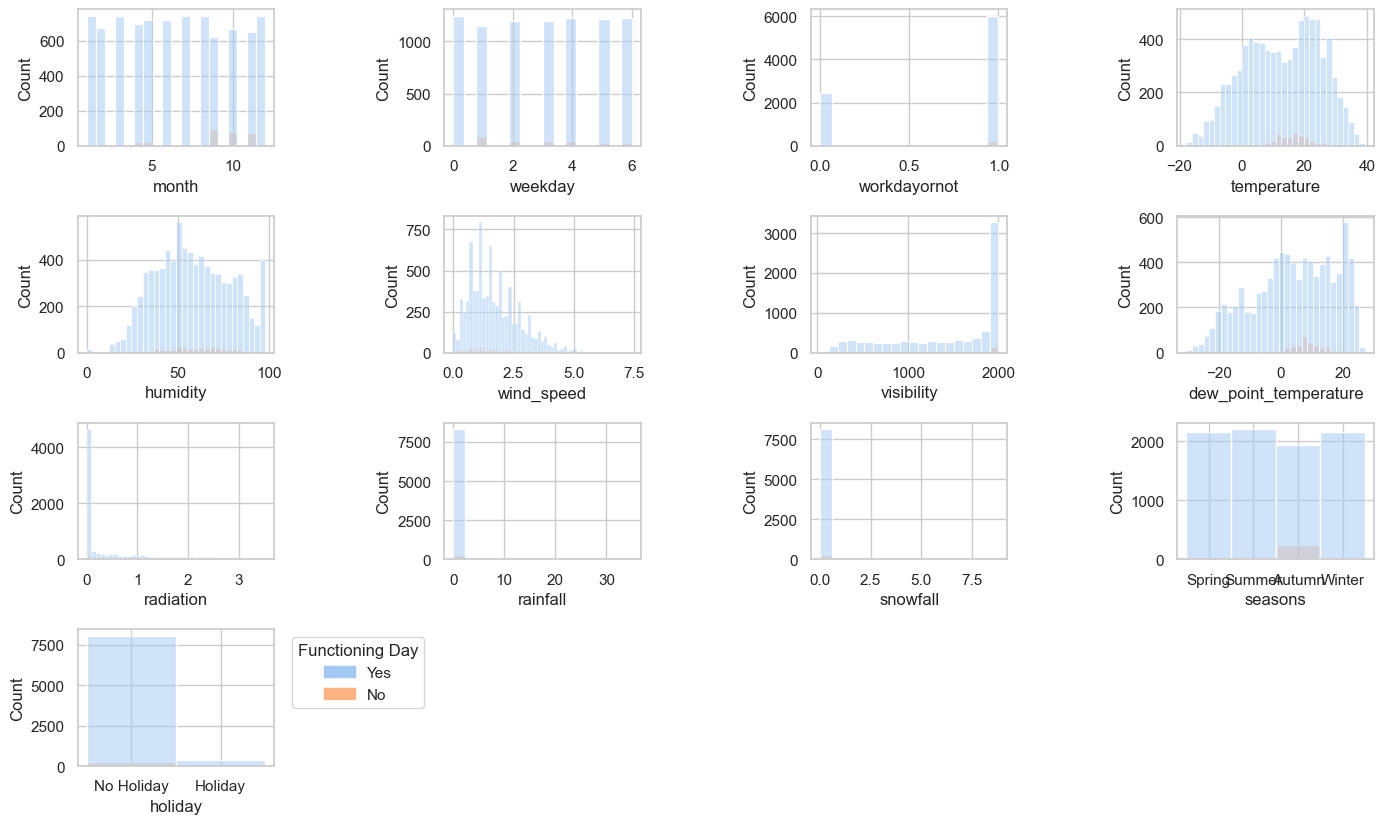

In [12]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 10))

variables = X.drop(["date","hour"], axis=1).columns

current_palette = sns.color_palette()
light_blue = current_palette[0]
light_orange = current_palette[1]

#color_map = {1: light_blue, 0: light_orange}
color_map = {"Yes": light_blue, "No": light_orange}


seasons_map = {
    'Spring': 'Spr', 'Summer': 'Sum', 'Autumn': 'Aut', 'Winter': 'Win'
}

for i, var in enumerate(variables):
    plt.subplot(5, 4, i + 1)
    if var == "Seasons":
        temp_data = seoulBike.copy()
        temp_data['Seasons'] = temp_data['Seasons'].map(seasons_map)
        sns.histplot(data=temp_data, x='Seasons', hue='functioning_day', palette=color_map, legend=False)
    else:
        sns.histplot(data=seoulBike, x=var, hue='functioning_day', palette=color_map, legend=False)

handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Functioning Day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Data correlations

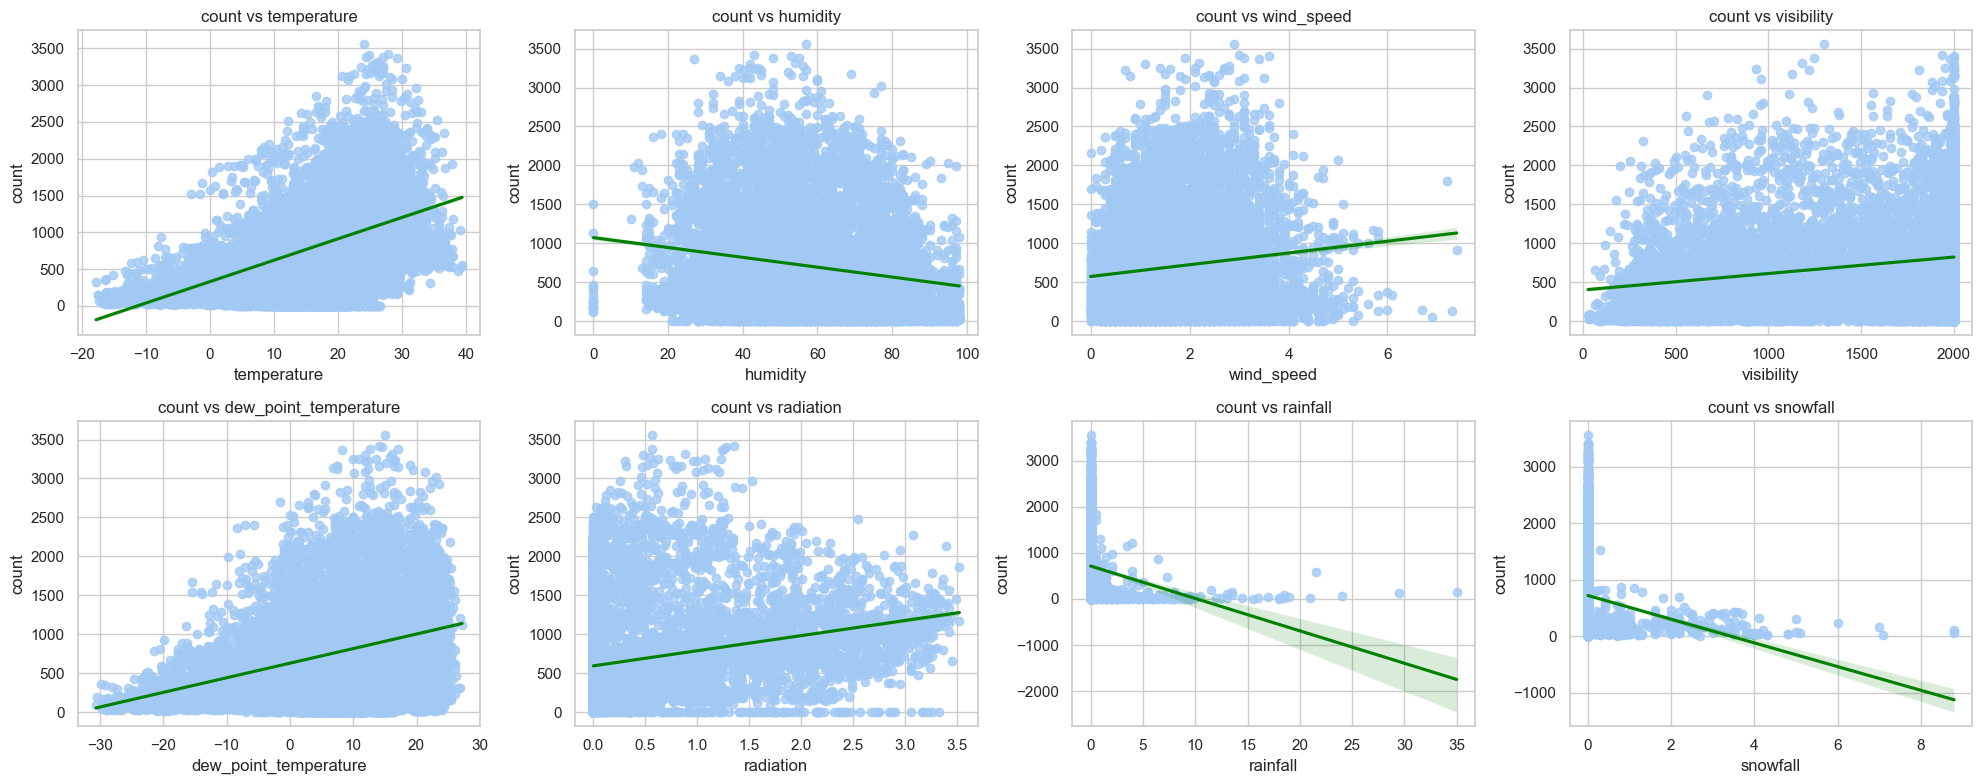

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = seoulBike.drop(["functioning_day", "month", "weekday", "workdayornot", "hour", "date", "seasons","holiday"], axis=1)

target = 'count'

plt.figure(figsize=(20, 8))

total_features = len(df.columns) - 1
cols_per_row = math.ceil(total_features / 2)

for i, feature in enumerate(df.columns):
    if feature == target:
        continue
    plt.subplot(2, cols_per_row, i)
    sns.regplot(data=df, x=feature, y=target,line_kws={"color": "green"})
    plt.title(f'{target} vs {feature}')

plt.tight_layout()
plt.show()

From the pairs plot and the VIF report, we have seen that the Dew point temperature has high correlation with Temperature, it will cause high multicollinearly in the model. If we want to use linear model in analysis, we might need to remove the Dew point temperature to reduce collinearly.

### Outlier of independent variables explore

Drop our numeric target variable "Rented bike count"

In [14]:
numerical_features=['count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'radiation', 'rainfall', 'snowfall']
categorical_features=['date', 'month', 'weekday', 'workdayornot', 'hour', 'seasons', 'holiday', 'functioning_day']
numerical_features.remove("count")

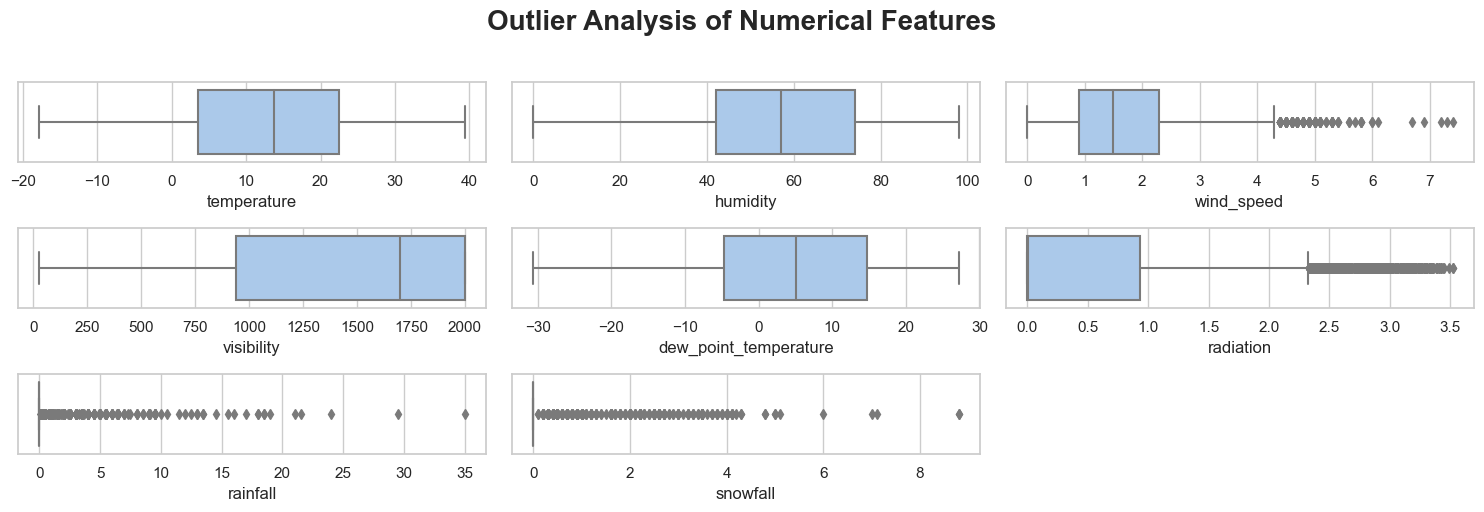

In [15]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)

    # countplot
    sns.boxplot(seoulBike[col])
    # x-axis label
    plt.xlabel(col)
    plt.tight_layout()

considering that 'rainfall', 'snowfall' are highly skewed, removing all oytliers may lead to information loss, drop target variable 'count' as well

ValueError: num must be 1 <= num <= 6, not 7

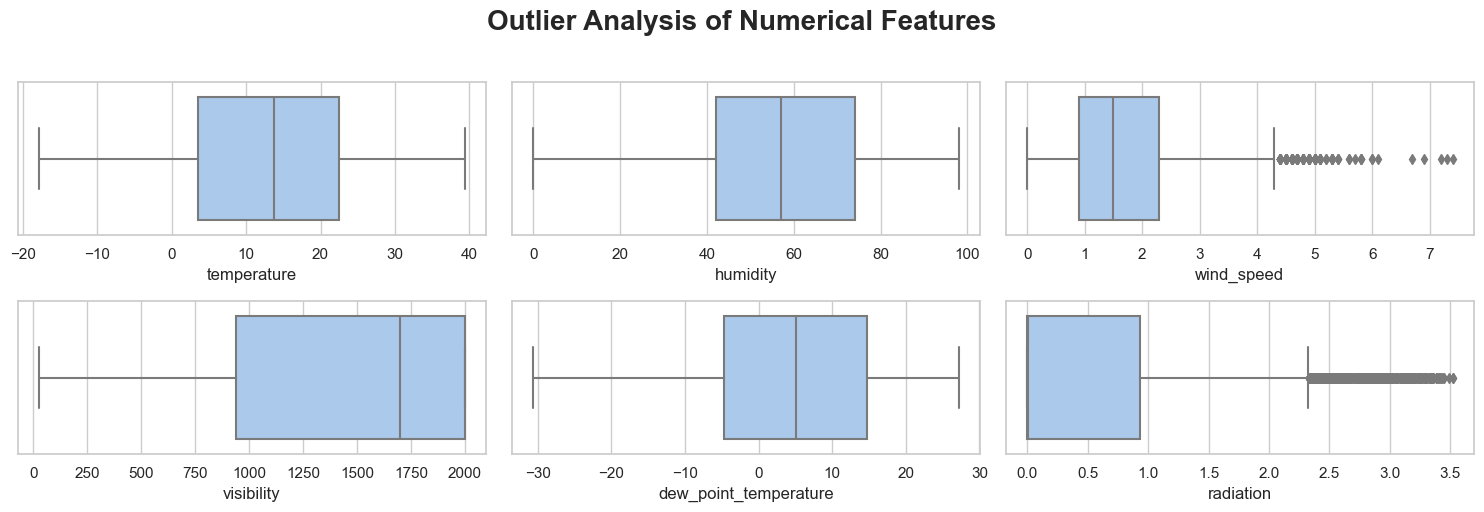

In [16]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)

    # countplot
    sns.boxplot(seoulBike[col])
    # x-axis label
    plt.xlabel(col)
    plt.tight_layout()

limited data points, use clipping method to address outliers. replace data points outside IQR with either minimum or maximum value of the IQR range

In [17]:
#numerical_features.remove("count")
numerical_features.remove("rainfall")
numerical_features.remove("snowfall")

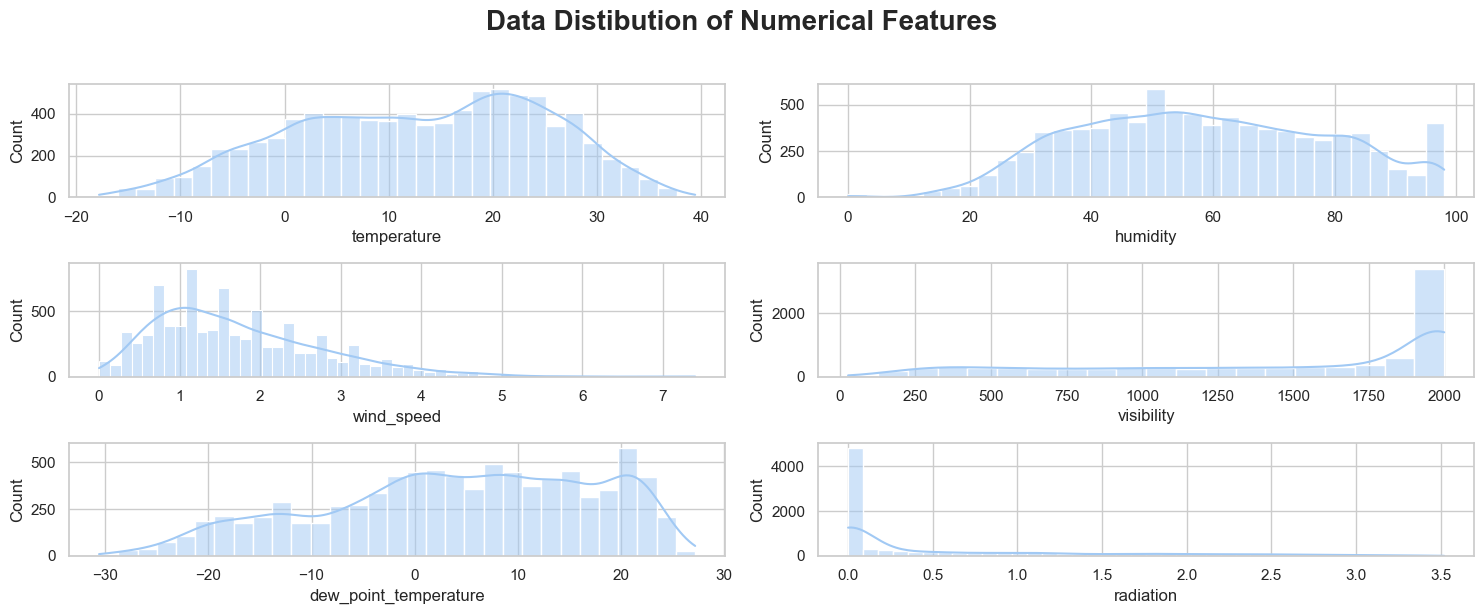

In [18]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

    # dist plots
    sns.histplot(seoulBike[col], kde=True)
    # x-axis label
    plt.xlabel(col)
    plt.tight_layout()

almost follow normal distribution

## Feature engineeering
the process of creating new feayres from exsiting ones to improve the performance of ml models. The success of ML models depend heavilty on the quality of the features.

### collinearity

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

seoulBike_vif = seoulBike.copy()

data_vif = seoulBike_vif.select_dtypes(include=['int64', 'float64'])
data_vif = data_vif.drop(labels = ["count"], axis = 1)


data_vif['Intercept'] = 1
data_vif
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted

feature         VIF
11              Intercept  398.916449
7   dew_point_temperature  116.494385
3             temperature   87.729551
4                humidity   20.487890
8               radiation    2.021605
6              visibility    1.601009
5              wind_speed    1.296868
2                    hour    1.185122
0                   month    1.115533
10               snowfall    1.107586
9                rainfall    1.085282
1                 weekday    1.010322

In [20]:
data_vif = seoulBike.select_dtypes(include=['int64', 'float64'])

data_vif = data_vif.drop(labels = ["count","dew_point_temperature"], axis = 1)


data_vif['Intercept'] = 1
data_vif
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]
vif_data_sorted2 = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted2

feature        VIF
10    Intercept  57.659233
4      humidity   2.559014
7     radiation   1.925399
3   temperature   1.671513
6    visibility   1.591355
5    wind_speed   1.294642
2          hour   1.182915
0         month   1.115520
9      snowfall   1.102352
8      rainfall   1.070925
1       weekday   1.003356

In [21]:
seoulBike.drop(['date', 'dew_point_temperature', 'weekday'], axis=1, inplace=True)

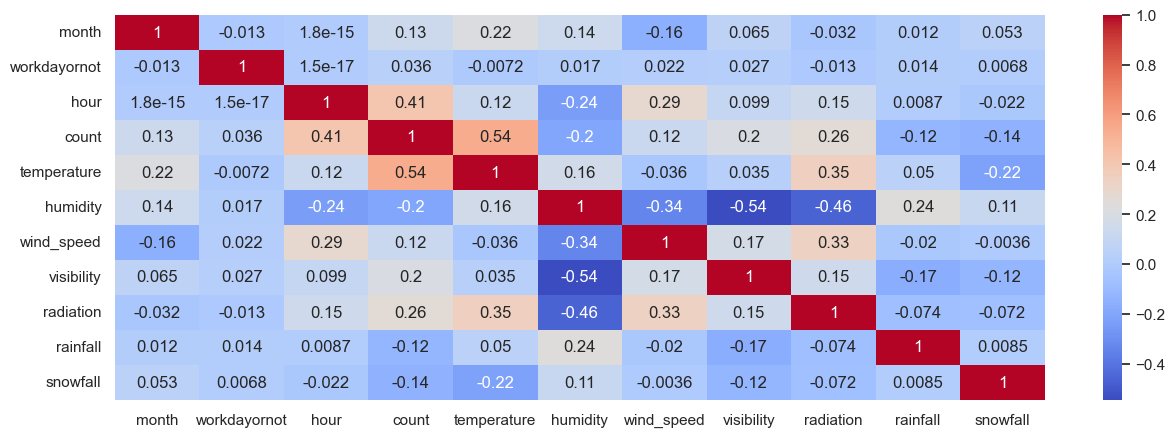

In [22]:
plt.figure(figsize=(15, 5))
sns.heatmap(seoulBike.corr(), annot=True, cmap='coolwarm')
plt.show()

did VIF and found that dew_point_temperature very high VIF value and less correlated to count than temperature, drop

In [23]:
seoulBike.head()

month  workdayornot  hour  count  temperature  humidity  wind_speed  \
0     12             1     0    254         -5.2        37         2.2   
1     12             1     1    204         -5.5        38         0.8   
2     12             1     2    173         -6.0        39         1.0   
3     12             1     3    107         -6.2        40         0.9   
4     12             1     4     78         -6.0        36         2.3   

   visibility  radiation  rainfall  snowfall seasons     holiday  \
0        2000        0.0       0.0       0.0  Winter  No Holiday   
1        2000        0.0       0.0       0.0  Winter  No Holiday   
2        2000        0.0       0.0       0.0  Winter  No Holiday   
3        2000        0.0       0.0       0.0  Winter  No Holiday   
4        2000        0.0       0.0       0.0  Winter  No Holiday   

  functioning_day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### encoding
one-hot encoding: 'seasons'

numerical encoding : 'holiday', 'functioning_day'

In [24]:
seasons_onehot=pd.get_dummies(seoulBike['seasons'], prefix='seasons')
seoulBike.drop('seasons', axis=1, inplace=True)
seoulBike=pd.concat([seoulBike, seasons_onehot], axis=1)
seoulBike['holiday']=seoulBike['holiday'].map({'Holiday':1, 'No Holiday':0})
seoulBike['functioning_day']=seoulBike['functioning_day'].map({'Yes':1, 'No':0})

In [25]:
seoulBike.head()

month  workdayornot  hour  count  temperature  humidity  wind_speed  \
0     12             1     0    254         -5.2        37         2.2   
1     12             1     1    204         -5.5        38         0.8   
2     12             1     2    173         -6.0        39         1.0   
3     12             1     3    107         -6.2        40         0.9   
4     12             1     4     78         -6.0        36         2.3   

   visibility  radiation  rainfall  snowfall  holiday  functioning_day  \
0        2000        0.0       0.0       0.0        0                1   
1        2000        0.0       0.0       0.0        0                1   
2        2000        0.0       0.0       0.0        0                1   
3        2000        0.0       0.0       0.0        0                1   
4        2000        0.0       0.0       0.0        0                1   

   seasons_Spring  seasons_Summer  seasons_Autumn  seasons_Winter  
0               0               0               0               1  
1               0               0               0               1  
2               0               0               0               1  
3               0               0               0               1  
4               0               0               0               1

## Explore response variables' distribution

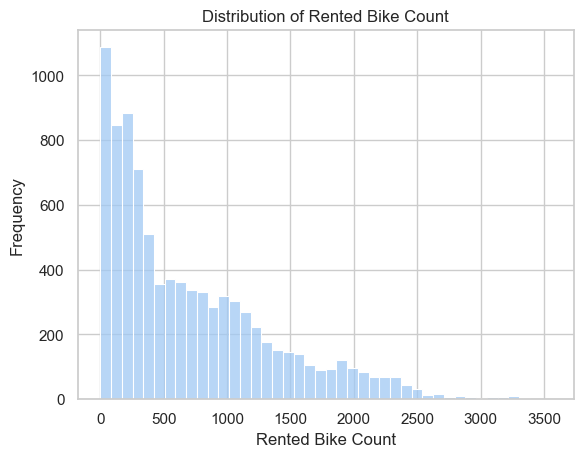

In [26]:
sns.histplot(y1) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Gamma test

from scipy.stats import gamma, kstest

data = y1

params = gamma.fit(data)

gamma_dist = gamma(*params)

ks_stat, ks_p_value = kstest(data, gamma_dist.cdf)

print(f"KS Statistic: {ks_stat}, P-value: {ks_p_value}")

KS Statistic: 0.1322315231872091, P-value: 5.037582228513449e-134


Rented Bike Count does not follow gamma distribution

In [28]:
# poisson test
 
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1, 'poisson', args=(np.mean(y1),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 0.5588529934657052
p-value: 0.0
y does not follow poisson distribution


In [29]:
import numpy as np
from scipy.stats import kstest, norm

y1_log = np.log(y1 + 1)  

ks_statistic, p_value = kstest(y1_log, 'norm', args=(np.mean(y1_log), np.std(y1_log, ddof=1)))

print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Log-transformed y does not follow a normal distribution.")
else:
    print("Log-transformed y follows a normal distribution.")

Kolmogorov-Smirnov statistic: 0.09904454614818506
p-value: 2.946020945222169e-75
Log-transformed y does not follow a normal distribution.


From the KS test and histogram above, we can see that the original data does not follow none of normal distribution, poisson distribuion, log normal or gamma distribution

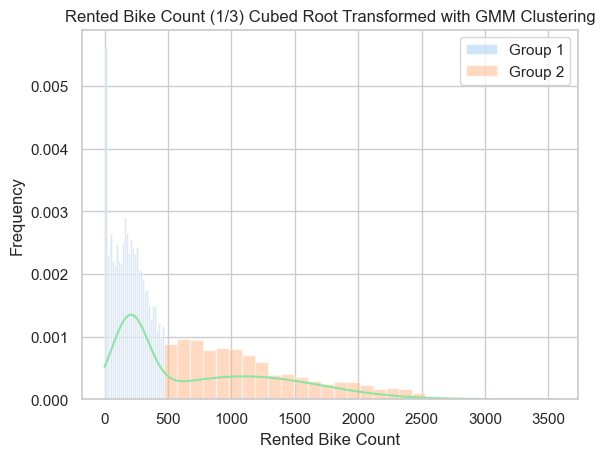

In [30]:
from sklearn.mixture import GaussianMixture

transformed_counts = y1.values.reshape(-1, 1)

# use Gaussian Mixture Model(GMM)
gmm = GaussianMixture(n_components=2, random_state=0).fit(transformed_counts)
group = gmm.predict(transformed_counts)

xr = np.linspace(transformed_counts.min(), transformed_counts.max(), 200).reshape(-1,1)
density = np.exp(gmm.score_samples(xr))
# print(density)
# print(gmm.means_)
# print(gmm.covariances_)
# print(gmm.weights_)

plt.hist(transformed_counts[group == 0], bins=30, alpha=0.5, label='Group 1',density = True)
plt.hist(transformed_counts[group == 1], bins=30, alpha=0.5, label='Group 2', density = True)
#plt.hist(transformed_counts[group == 2], bins=30, alpha=0.5, label='Group 2', density = True)
#plt.hist(transformed_counts[group == 3], bins=30, alpha=0.5, label='Group 2', density = True)
plt.plot(xr,density)

plt.legend()
plt.title('Rented Bike Count (1/3) Cubed Root Transformed with GMM Clustering')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')



plt.show()

As shown above, we can see that the rented bike count does not follow GMM

### normalization of target variable

reason: linear regression requires dependent variable follows a normal distribution

count: (from violin and boxplot) has outliers and right-skewness

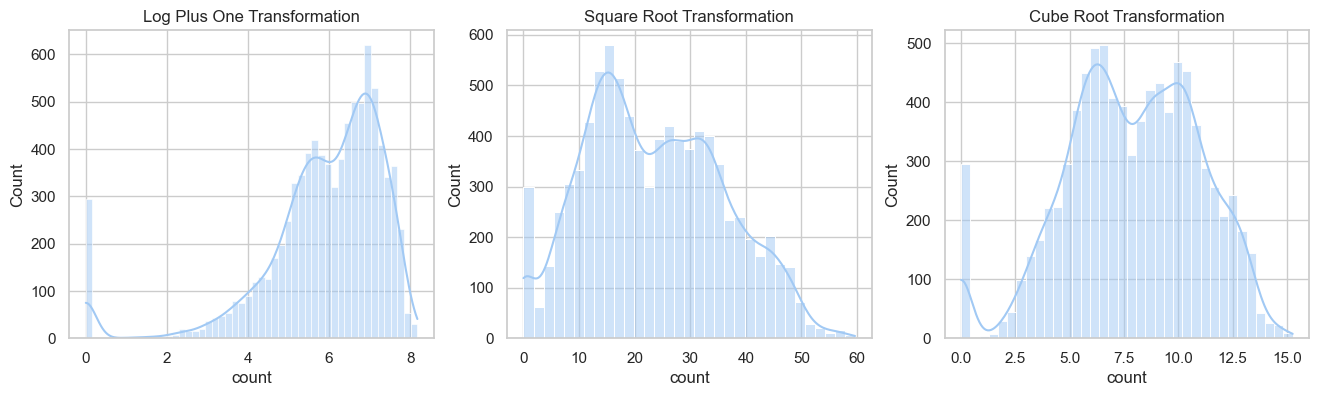

In [31]:
fig, axs=plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(np.log1p(seoulBike['count']),ax=axs[0], kde=True)
axs[0].set_title('Log Plus One Transformation')
sns.histplot(np.sqrt(seoulBike['count']),ax=axs[1], kde=True)
axs[1].set_title('Square Root Transformation')
sns.histplot(np.cbrt(seoulBike['count']),ax=axs[2], kde=True)
axs[2].set_title('Cube Root Transformation')
plt.show()

therefore, choose sqrt trandformation to make it become a well-distributed form(no clear skewness)

In [32]:
idx=seoulBike['functioning_day']==1

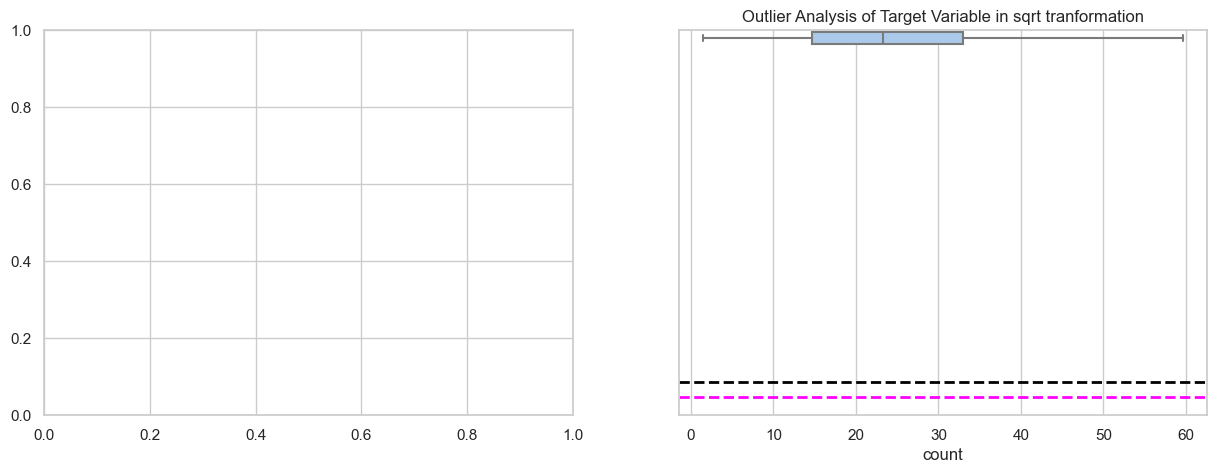

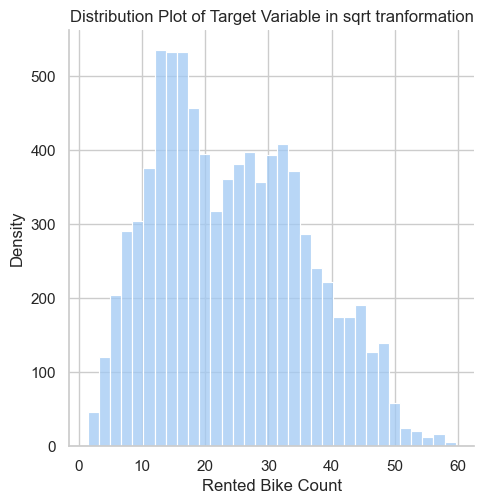

In [33]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.displot(np.sqrt(seoulBike.loc[idx, ]['count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# # mean line
# ax[0].axvline(np.sqrt(seoulBike['count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# # median line
# ax[0].axvline(np.sqrt(seoulBike['count']).median(), color='black', linestyle='dashed', linewidth=2)
# # Boxplot

box = sns.boxplot(np.sqrt(seoulBike.loc[idx, ]['count']), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
# mean line
ax[1].axhline(np.sqrt(seoulBike.loc[idx, ]['count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
ax[1].axhline(np.sqrt(seoulBike.loc[idx, ]['count']).median(), color='black', linestyle='dashed', linewidth=2)
# Boxplot
plt.show()

# EDA

In [34]:
seoulBike_eda = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

seoulBike_eda['Date'] = pd.to_datetime(seoulBike_eda['Date'], format='%d/%m/%Y')
seoulBike_eda['Month'] = seoulBike_eda['Date'].dt.month
seoulBike_eda['Seasons'] = pd.Categorical(seoulBike_eda['Seasons'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

def map_to_weekday(day_of_week):
    # 0 - 4: Mon to Fri   5,6: Sat, Sun
    if day_of_week < 5:
        return '1'
    else:
        return '0'

seoulBike_eda['Weekday'] = seoulBike_eda['Date'].dt.dayofweek
seoulBike_eda['WeekdayOrNot'] = seoulBike_eda['Date'].dt.dayofweek.apply(map_to_weekday)
seoulBike_eda['WorkdayOrNot'] = seoulBike_eda['WeekdayOrNot'].astype("category")
seoulBike_eda['Month'] = seoulBike_eda['Month'].astype("category")
seoulBike_eda['Weekday'] = seoulBike_eda['Weekday'].astype("category")

seoulBike_eda = seoulBike_eda[['Date', 'Month', "Weekday",'WorkdayOrNot', 'Hour', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]


seoulBike_eda.head()

Date Month Weekday WorkdayOrNot  Hour  Rented Bike Count  \
0 2017-12-01    12       4            1     0                254   
1 2017-12-01    12       4            1     1                204   
2 2017-12-01    12       4            1     2                173   
3 2017-12-01    12       4            1     3                107   
4 2017-12-01    12       4            1     4                 78   

   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day  
0            0.0  Winter  No Holiday             Yes  
1            0.0  Winter  No Holiday             Yes  
2            0.0  Winter  No Holiday             Yes  
3            0.0  Winter  No Holiday             Yes  
4            0.0  Winter  No Holiday             Yes

In [35]:
aggregation_date = {
    #'Rented Bike Count': ['mean','max','min'],
    'Rented Bike Count': 'sum',
    #'Hour': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "last",
    'Seasons': 'first',
    "Month":"first",
    'Holiday': 'first',
    "Weekday": "first",
    "WorkdayOrNot": "first"
}

day_bike = seoulBike_eda.groupby('Date').agg(aggregation_date).reset_index()
day_bike.head()

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0 2017-12-01               9539        -2.454167    45.875000   
1 2017-12-02               8523         1.325000    61.958333   
2 2017-12-03               7222         4.875000    81.541667   
3 2017-12-04               8729        -0.304167    52.500000   
4 2017-12-05               8307        -4.458333    36.416667   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          1.537500       1870.750000                 -13.545833   
1          1.712500       1471.083333                  -5.716667   
2          1.612500        455.750000                   1.883333   
3          3.450000       1362.833333                  -9.925000   
4          1.108333       1959.458333                 -17.425000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Functioning Day  \
0                 0.248750      0.000000            0.0             Yes   
1                 0.263750      0.000000            0.0             Yes   
2                 0.125417      0.166667            0.0             Yes   
3                 0.282917      0.004167            0.0             Yes   
4                 0.035833      0.000000            0.0             Yes   

  Seasons Month     Holiday Weekday WorkdayOrNot  
0  Winter    12  No Holiday       4            1  
1  Winter    12  No Holiday       5            0  
2  Winter    12  No Holiday       6            0  
3  Winter    12  No Holiday       0            1  
4  Winter    12  No Holiday       1            1

Text(0.5, 1.0, 'Count of Functioning Day')

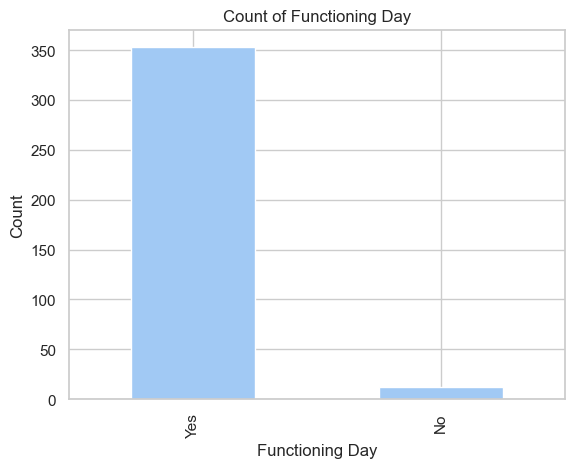

In [37]:
functioning_day_count = day_bike['Functioning Day'].value_counts()
functioning_day_count.plot(kind='bar')

plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.title('Count of Functioning Day')

In [38]:
# non_functiondays in holiday
day_bike[(day_bike["Holiday"] == "Holiday") & (day_bike["Functioning Day"] == "No")]

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
312 2018-10-09                  0             15.0       52.625   

     Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
312            1.1375       1992.583333                   5.008333   

     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Functioning Day  \
312                 0.370417           0.0            0.0              No   

    Seasons Month  Holiday Weekday WorkdayOrNot  
312  Autumn    10  Holiday       1            1

In [39]:
# non function days in weekends
day_bike[(day_bike["WorkdayOrNot"] == str(0)) & (day_bike["Functioning Day"] == "No")]


Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
303 2018-09-30                  0        17.916667    53.791667   
337 2018-11-03                  0        11.258333    56.458333   

     Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
303            2.0250       1928.250000                     7.6000   
337            1.2375       1070.166667                     1.9375   

     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Functioning Day  \
303                  0.70625           0.0            0.0              No   
337                  0.56625           0.0            0.0              No   

    Seasons Month     Holiday Weekday WorkdayOrNot  
303  Autumn     9  No Holiday       6            0  
337  Autumn    11  No Holiday       5            0

In [40]:
chart_season = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Seasons"),
    alt.Y("count()"),
    color=alt.Color("Functioning Day", scale=alt.Scale(scheme='set1')),
).properties(
    width = 230,
    height = 250
)

chart_holiday = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Holiday"),
    alt.Y("count()"),
    color=alt.Color("Functioning Day", scale=alt.Scale(scheme='set2')),
).properties(
    width = 230,
    height = 250
)

weekday_mapping = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

weekday_mapping = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

chart_weekday = alt.Chart(day_bike).mark_line().encode(
    alt.X("Weekday:N", axis=alt.Axis(title='Weekday',
                                     labelExpr="datum.value === 0 ? 'Mon' : datum.value === 1 ? 'Tue' : datum.value === 2 ? 'Wed' : datum.value === 3 ? 'Thu' : datum.value === 4 ? 'Fri' : datum.value === 5 ? 'Sat' : 'Sun'",
                                      ticks=False
                                     )
         ),
    alt.Y("count()"),
    color=alt.Color("Functioning Day", scale=alt.Scale(scheme='accent')),
).properties(
    width=230,
    height=250
)

chart_workday = alt.Chart(day_bike).mark_bar().encode(
    alt.X("WorkdayOrNot:N",
          axis=alt.Axis(title='Workday',
                        labelExpr="datum.value === '0' ? 'No' : 'Yes'"
                       )
         ),
    alt.Y("count()"),
    color=alt.Color("Functioning Day", scale=alt.Scale(scheme='paired')),
).properties(
    width=230,
    height=250
)

chart_season | chart_weekday | chart_holiday | chart_workday

alt.HConcatChart(...)

"No function days" predominantly occur within "non-holiday" periods, with the majority of them concentrated in the spring and autumn seasons.

In [41]:
FunctionBike = seoulBike_eda[seoulBike_eda["Functioning Day"] == "Yes"]
hours_bike = FunctionBike.groupby(["Hour","Holiday"]).mean().reset_index()
hours_bike.head()

hour_holiday_plot = alt.Chart(hours_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("Holiday", legend=alt.Legend(title="Holiday"))
).properties(
    title="Hourly Rented Bike Counts by Holiday"
)

hour_holiday_plot.display()

alt.Chart(...)

In [42]:
hours_season_bike = seoulBike_eda.groupby(["Hour","Seasons"]).mean().reset_index()
hours_season_bike.head()


hour_season_plot = alt.Chart(hours_season_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("Seasons", legend=alt.Legend(title="Seasons"), scale=alt.Scale(scheme='tableau10'))  # Change color scheme
).properties(
    title="Hourly Rented Bike Counts by Season"
)

hour_season_plot.display()

alt.Chart(...)

In [43]:
FunctionBike = seoulBike_eda[seoulBike_eda["Functioning Day"] == "Yes"]
hours_bike = FunctionBike.groupby(["Hour","WorkdayOrNot"]).mean().reset_index()
hours_bike["WorkdayOrNot"] = hours_bike["WorkdayOrNot"].astype('category')
hours_bike.head()

hour_plot_work = alt.Chart(hours_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("WorkdayOrNot", legend=alt.Legend(title="WorkdayOrNot"), scale=alt.Scale(scheme='tableau10'))
).properties(
    title="Hourly Rented Bike Counts by Weekday"
)

hour_plot_work.display()

alt.Chart(...)

The peak usage of shared bikes is concentrated during the morning and evening rush hours. In other cases, while the demand for bikes on non-holidays is also high, it does not differ significantly from that on holidays.

In [44]:
# Monthly demand of rented bike
# Sum up "Rented Bike Count" for each day
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()

# # Extract month from the date
daily_bike_sum['Month'] = daily_bike_sum['Date'].dt.month
daily_bike_sum

# # Group by both "Date" and "Month" to sum up for each day
daily_bike_sum = daily_bike_sum.groupby(['Date', 'Month'])['Rented Bike Count'].sum().reset_index()
daily_bike_sum

# # Group by "Month" to calculate mean, max, and min
monthly_bike_stats = daily_bike_sum.groupby('Month')['Rented Bike Count'].agg(['mean', 'max', 'min']).reset_index()

monthly_bike_stats['Month'] = monthly_bike_stats['Month'].astype('category')

base = alt.Chart(monthly_bike_stats).encode(
    alt.X('Month:O', title='Month', axis=alt.Axis(labelAngle=0))
).properties(
    width=500,
    height=300
)

mean_line = base.mark_line(color='blue').encode(
    alt.Y('mean:Q', title='Average Rented Bike Count')
)

error_bars = base.mark_errorbar(
    color='green',
    size=2,
    ticks=True
).encode(
    alt.Y('min:Q'),
    alt.Y2('max:Q')
)

final_chart = error_bars + mean_line

final_chart.display()

alt.LayerChart(...)

In [45]:
# Sum up "Rented Bike Count" for each day
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()

# Extract weekday from the date (Monday=0, Sunday=6)
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek

# Group by both "Date" and "Weekday" to sum up for each day
daily_bike_sum = daily_bike_sum.groupby(['Date', 'Weekday'])['Rented Bike Count'].sum().reset_index()

# Group by "Weekday" to calculate mean, max, and min
weekday_bike_stats = daily_bike_sum.groupby('Weekday')['Rented Bike Count'].agg(['mean', 'max', 'min']).reset_index()
weekday_bike_stats

Weekday          mean    max   min
0        0  17533.519231  33257   977
1        1  17887.416667  35349  3360
2        2  18479.120000  36149  3154
3        3  17239.980000  34621  1721
4        4  18634.000000  35103  2593
5        5  17362.588235  34360  2693
6        6  15297.921569  32487  2014

In [46]:
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek


# Ensure the 'Weekday' column has descriptive names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
daily_bike_sum['Weekday Name'] = daily_bike_sum['Weekday'].apply(lambda x: weekday_names[x])
daily_bike_sum

name_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

chart_week = alt.Chart(daily_bike_sum).mark_boxplot().encode(
    x=alt.X('Weekday Name:N', title='Day of the Week', sort=name_order),  # Use the named weekdays for x-axis
    y=alt.Y('Rented Bike Count:Q', title='Rented Bike Count')
).properties(
    title='Boxplot of Rented Bike Counts by Weekday',
    width = 350
)
chart_week

alt.Chart(...)

In [47]:
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek
daily_bike_sum['WeekdayOrNot'] = daily_bike_sum['Weekday'].apply(lambda x: 1 if x < 5 else 0)
#daily_bike_sum['WeekdayOrNot'] = daily_bike_sum['Weekday'].apply(lambda x: 0 if x == 0 or x == 6 else 1)

daily_bike_sum['WeekdayOrNot'] = daily_bike_sum['WeekdayOrNot'].astype('category')
daily_bike_sum

# Map 'WeekdayOrNot' to more descriptive labels for better readability in the plot
daily_bike_sum['Day Type'] = daily_bike_sum['WeekdayOrNot'].map({1: 'Weekday', 0: 'Weekend'})


# Create the box plot
chart_workday = alt.Chart(daily_bike_sum).mark_boxplot(size = 100).properties(
    title='Distribution of Rented Bike Counts by Day Type',
    width = 300
).encode(
    x=alt.X('Day Type:N', title='Day Type'),  # Nominally encode the 'Day Type' as the x-axis
    y=alt.Y('Rented Bike Count:Q', title='Rented Bike Count'),  # Quantitatively encode 'Rented Bike Count' as the y-axis,
)

#(chart_week | chart_workday).display()
chart_workday

alt.Chart(...)

##  Time series analysis of Rented bike count

In [48]:
seoulBike_transformed = seoulBike_eda.copy()

seoulBike_transformed["Datetime"] = pd.to_datetime(seoulBike_transformed['Date']) + pd.to_timedelta(seoulBike_transformed['Hour'], 
                                                                                                    unit='h')
seoulBike_transformed.set_index("Datetime", inplace = True)
seoulBike_transformed.drop(columns=["Date","Hour"], inplace=True)
seoulBike_transformed

Month Weekday WorkdayOrNot  Rented Bike Count  \
Datetime                                                            
2017-12-01 00:00:00    12       4            1                254   
2017-12-01 01:00:00    12       4            1                204   
2017-12-01 02:00:00    12       4            1                173   
2017-12-01 03:00:00    12       4            1                107   
2017-12-01 04:00:00    12       4            1                 78   
...                   ...     ...          ...                ...   
2018-11-30 19:00:00    11       4            1               1003   
2018-11-30 20:00:00    11       4            1                764   
2018-11-30 21:00:00    11       4            1                694   
2018-11-30 22:00:00    11       4            1                712   
2018-11-30 23:00:00    11       4            1                584   

                     Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Datetime                                                              
2017-12-01 00:00:00             -5.2           37               2.2   
2017-12-01 01:00:00             -5.5           38               0.8   
2017-12-01 02:00:00             -6.0           39               1.0   
2017-12-01 03:00:00             -6.2           40               0.9   
2017-12-01 04:00:00             -6.0           36               2.3   
...                              ...          ...               ...   
2018-11-30 19:00:00              4.2           34               2.6   
2018-11-30 20:00:00              3.4           37               2.3   
2018-11-30 21:00:00              2.6           39               0.3   
2018-11-30 22:00:00              2.1           41               1.0   
2018-11-30 23:00:00              1.9           43               1.3   

                     Visibility (10m)  Dew point temperature(°C)  \
Datetime                                                           
2017-12-01 00:00:00              2000                      -17.6   
2017-12-01 01:00:00              2000                      -17.6   
2017-12-01 02:00:00              2000                      -17.7   
2017-12-01 03:00:00              2000                      -17.6   
2017-12-01 04:00:00              2000                      -18.6   
...                               ...                        ...   
2018-11-30 19:00:00              1894                      -10.3   
2018-11-30 20:00:00              2000                       -9.9   
2018-11-30 21:00:00              1968                       -9.9   
2018-11-30 22:00:00              1859                       -9.8   
2018-11-30 23:00:00              1909                       -9.3   

                     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
Datetime                                                                    
2017-12-01 00:00:00                      0.0           0.0            0.0   
2017-12-01 01:00:00                      0.0           0.0            0.0   
2017-12-01 02:00:00                      0.0           0.0            0.0   
2017-12-01 03:00:00                      0.0           0.0            0.0   
2017-12-01 04:00:00                      0.0           0.0            0.0   
...                                      ...           ...            ...   
2018-11-30 19:00:00                      0.0           0.0            0.0   
2018-11-30 20:00:00                      0.0           0.0            0.0   
2018-11-30 21:00:00                      0.0           0.0            0.0   
2018-11-30 22:00:00                      0.0           0.0            0.0   
2018-11-30 23:00:00                      0.0           0.0            0.0   

                    Seasons     Holiday Functioning Day  
Datetime                                                 
2017-12-01 00:00:00  Winter  No Holiday             Yes  
2017-12-01 01:00:00  Winter  No Holiday             Yes  
2017-12-01 02:00:00  Winter  No Holiday             Yes  
2017-12-01 03:00:00  

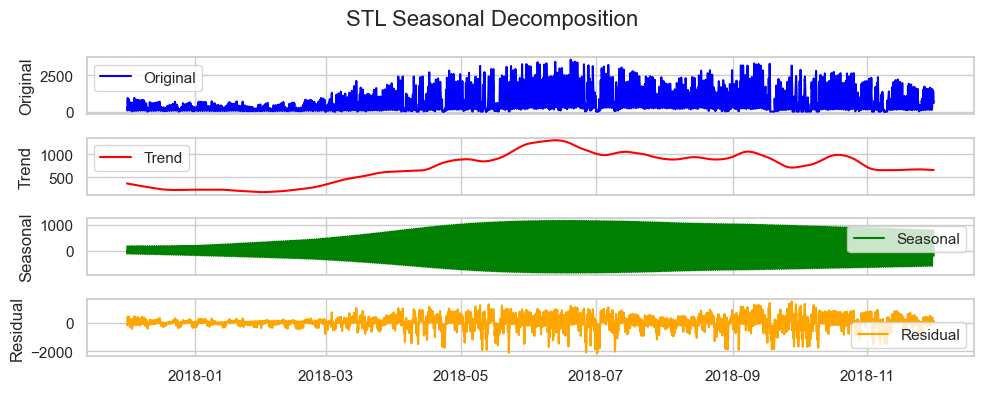

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


stl = sm.tsa.STL(seoulBike_transformed['Rented Bike Count'], period=24, trend=31*24+1, seasonal = 24 * 7 + 1)
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 4), sharex=True)


axes[0].plot(seoulBike_transformed.index, seoulBike_transformed["Rented Bike Count"], label='Original', color='blue')
axes[0].set_ylabel('Original', fontsize=12)
axes[0].legend()

axes[1].plot(seoulBike_transformed.index, trend, label='Trend', color='red')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].legend()


axes[2].plot(seoulBike_transformed.index, seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].legend()

axes[3].plot(seoulBike_transformed.index, residual, label='Residual', color='orange')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].legend()

fig.suptitle('STL Seasonal Decomposition', fontsize=16)

plt.tight_layout()
plt.show()

Now we show just the first two week's data to see the seasonal clearly

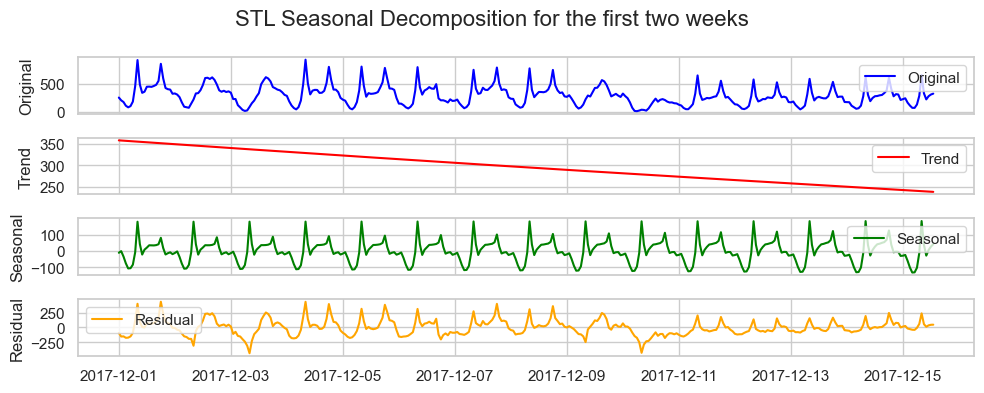

In [49]:
limit = 350  

fig, axes = plt.subplots(4, 1, figsize=(10, 4), sharex=True)
axes[0].plot(seoulBike_transformed.index[:limit], seoulBike_transformed["Rented Bike Count"].iloc[:limit], label='Original', color='blue')
axes[0].set_ylabel('Original', fontsize=12)
axes[0].legend()

axes[1].plot(seoulBike_transformed.index[:limit], trend[:limit], label='Trend', color='red')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].legend()

axes[2].plot(seoulBike_transformed.index[:limit], seasonal[:limit], label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].legend()

axes[3].plot(seoulBike_transformed.index[:limit], residual[:limit], label='Residual', color='orange')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].legend()

fig.suptitle('STL Seasonal Decomposition for the first two weeks', fontsize=16)

plt.tight_layout()
plt.show()

We can clearly see the daily seasonal for hourly rented bike count

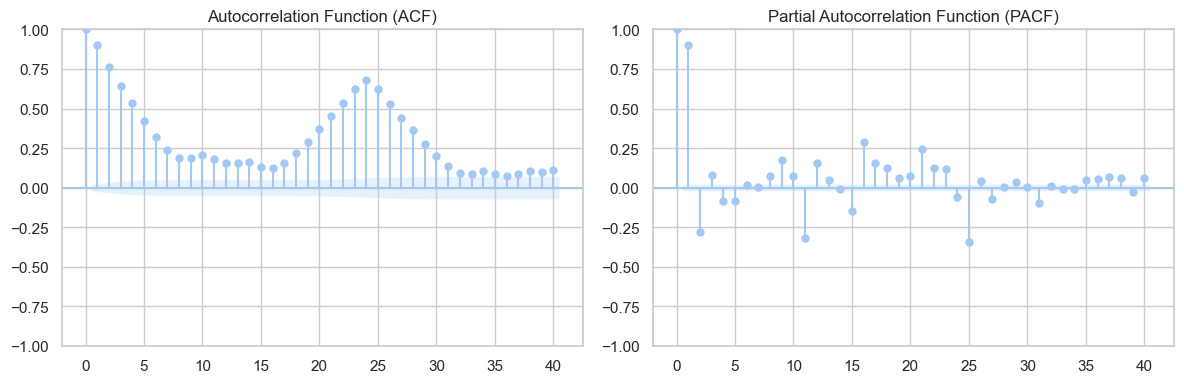

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(seoulBike_transformed['Rented Bike Count'], ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(seoulBike_transformed['Rented Bike Count'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Models for predict sharing bike's operation Status

In [51]:
aggregation_date = {
    #'Rented Bike Count': ['mean','max','min'],
    'Rented Bike Count': 'sum',
    #'Hour': 'mean',
    "Month":'first',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "last",
    'Seasons': 'first',
    'Holiday': 'first',
    "Weekday": "first",
    "WorkdayOrNot": "first"
}

day_bike = seoulBike_eda.groupby('Date').agg(aggregation_date)
bike_day = day_bike.copy().reset_index()
bike_day = bike_day.drop(["Rented Bike Count","Date"], axis = 1)
bike_day["Holiday"] = bike_day["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
bike_day["Functioning Day"] = bike_day["Functioning Day"].replace({'No': 0, 'Yes': 1})

bike_day["WorkdayOrNot"] = bike_day["WorkdayOrNot"].astype("int")
bike_day["Month"] = bike_day["Month"].astype("int")
bike_day["Weekday"] = bike_day["Weekday"].astype("int")
bike_day = pd.get_dummies(bike_day, columns = ["Seasons"])
bike_day.head()
bike_day_X = bike_day.drop(["Functioning Day"], axis = 1)
bike_day_y = bike_day["Functioning Day"]

In [52]:
bike_day_X

Month  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0       12        -2.454167    45.875000          1.537500       1870.750000   
1       12         1.325000    61.958333          1.712500       1471.083333   
2       12         4.875000    81.541667          1.612500        455.750000   
3       12        -0.304167    52.500000          3.450000       1362.833333   
4       12        -4.458333    36.416667          1.108333       1959.458333   
..     ...              ...          ...               ...               ...   
360     11         6.320833    70.500000          1.029167        475.000000   
361     11         7.066667    68.000000          1.350000        405.291667   
362     11         5.304167    25.791667          1.695833       1429.083333   
363     11         3.304167    38.000000          1.212500       1596.708333   
364     11         2.762500    47.208333          1.433333       1581.916667   

     Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   -13.545833                 0.248750      0.000000   
1                    -5.716667                 0.263750      0.000000   
2                     1.883333                 0.125417      0.166667   
3                    -9.925000                 0.282917      0.004167   
4                   -17.425000                 0.035833      0.000000   
..                         ...                      ...           ...   
360                   0.845833                 0.418750      0.000000   
361                   1.000000                 0.192500      0.000000   
362                 -13.350000                 0.403333      0.000000   
363                  -9.808333                 0.117083      0.000000   
364                  -8.370833                 0.425833      0.000000   

     Snowfall (cm)  Holiday  Weekday  WorkdayOrNot  Seasons_Spring  \
0         0.000000        0        4             1               0   
1         0.000000        0        5             0               0   
2         0.000000        0        6             0               0   
3         0.000000        0        0             1               0   
4         0.000000        0        1             1               0   
..             ...      ...      ...           ...             ...   
360       0.120833        0        0             1               0   
361       0.000000        0        1             1               0   
362       0.000000        0        2             1               0   
363       0.000000        0        3             1               0   
364       0.000000        0        4             1               0   

     Seasons_Summer  Seasons_Autumn  Seasons_Winter  
0                 0               0               1  
1                 0               0               1  
2                 0               0               1  
3                 0               0               1  
4                 0               0               1  
..              ...             ...             ...  
360               0               1               0  
361               0               1               0  
362               0               1               0  
363               0               1               0  
364               0               1               0  

[365 rows x 16 columns]

## SMOTE Resampling

Since the original data is unbalanced, we use SMOTE to resample the data

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(bike_day_X, bike_day_y)
print(np.sum(y_resampled == 0),np.sum(y_resampled == 1))

353 353


## Split Train and Test

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

print(X_train.shape[0], len(y_train))
print(X_test.shape[0],len(y_test))

564 564
142 142


In [55]:
X_train

Month  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
215      7        27.462500    69.333333          1.658333       1868.416667   
577     11        12.124347    69.908019          1.168862        496.668014   
312     10        15.000000    52.625000          1.137500       1992.583333   
482      9        18.424410    55.368912          1.642572       1942.704480   
651      9        17.058901    56.430229          1.266606       1998.087325   
..     ...              ...          ...               ...               ...   
359     11         4.862500    76.958333          0.966667        461.791667   
192      6        20.558333    63.375000          1.420833       1912.791667   
629      9        17.111729    58.122164          1.374928       1962.405855   
559      9        22.069130    59.718227          1.094569       1763.491826   
684     10        15.529964    58.150158          1.470137       1891.861958   

     Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
215                  21.104167                 0.934583      0.000000   
577                   6.530059                 0.336695      0.096117   
312                   5.008333                 0.370417      0.000000   
482                   8.632772                 0.683131      0.000000   
651                   8.127262                 0.366000      0.000000   
..                         ...                      ...           ...   
359                   0.825000                 0.329167      0.000000   
192                  13.004167                 0.469583      0.166667   
629                   8.526840                 0.464660      0.000000   
559                  13.388317                 0.526619      0.005156   
684                   6.722260                 0.650903      0.000000   

     Snowfall (cm)  Holiday  Weekday  WorkdayOrNot  Seasons_Spring  \
215          0.000        0        2             1               0   
577          0.000        0        1             1               0   
312          0.000        1        1             1               0   
482          0.000        0        4             0               0   
651          0.000        0        3             1               0   
..             ...      ...      ...           ...             ...   
359          1.725        0        6             0               0   
192          0.000        0        0             1               0   
629          0.000        0        3             1               0   
559          0.000        0        1             1               0   
684          0.000        0        1             1               0   

     Seasons_Summer  Seasons_Autumn  Seasons_Winter  
215               1               0               0  
577               0               1               0  
312               0               1               0  
482               0               1               0  
651               0               1               0  
..              ...             ...             ...  
359               0               1               0  
192               1               0               0  
629               0               1               0  
559               0               1               0  
684               0               1               0  

[564 rows x 16 columns]

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GradientBoosting

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


clf = GradientBoostingClassifier()

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

clf_train_accuracy = clf.score(X_train_scaled, y_train)
clf_test_accuracy = clf.score(X_test_scaled, y_test)
print(f"GradientBoosting training score is {clf_train_accuracy}, test score is {clf_test_accuracy}")

confusionmatrix = confusion_matrix(y_test,y_pred)
print("GradientBoosting's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for GradientBoosting is {accuracy_score(y_test,y_pred)}")

report = metrics.classification_report(y_test,y_pred)
print("Classification metrics for GradientBoosting model:")
print(report)

Accuracy: 0.9577464788732394
GradientBoosting training score is 0.99822695035461, test score is 0.9577464788732394
GradientBoosting's confusion matirx is:
[[72  0]
 [ 6 64]]
The AUC score for GradientBoosting is 0.9577464788732394
Classification metrics for GradientBoosting model:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.91      0.96        70

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [58]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning (example using GridSearchCV)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}
Best cross-validation score: 0.9716814159292035


In [59]:
best_clf=GradientBoostingClassifier(**grid_search.best_params_,random_state=42)
best_clf.fit(X_train_scaled, y_train)

train_accuracy = best_clf.score(X_train_scaled, y_train)
test_accuracy = best_clf.score(X_test_scaled, y_test)
print(f"GradientBoosting training score is {train_accuracy}, test score is {test_accuracy}")

prediction = best_clf.predict(X_test_scaled)
confusionmatrix = confusion_matrix(y_test,prediction)
print("GradientBoosting's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for GradientBoosting is {accuracy_score(y_test,prediction)}")

report = metrics.classification_report(y_test, best_clf.predict(X_test_scaled))
print("Classification metrics for GradientBoosting model:")
print(report)

GradientBoosting training score is 1.0, test score is 0.971830985915493
GradientBoosting's confusion matirx is:
[[72  0]
 [ 4 66]]
The AUC score for GradientBoosting is 0.971830985915493
Classification metrics for GradientBoosting model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.94      0.97        70

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



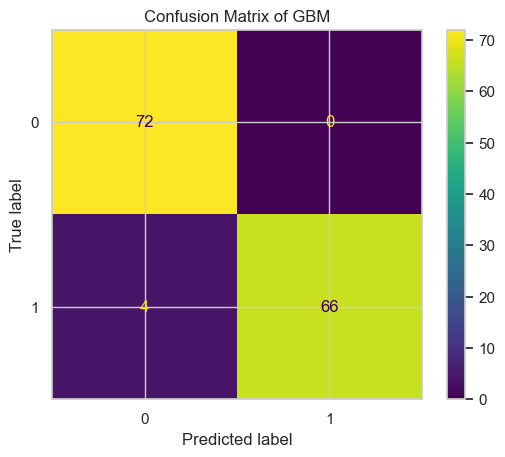

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_clf, X_test_scaled, y_test)
plt.title('Confusion Matrix of GBM')
plt.show()

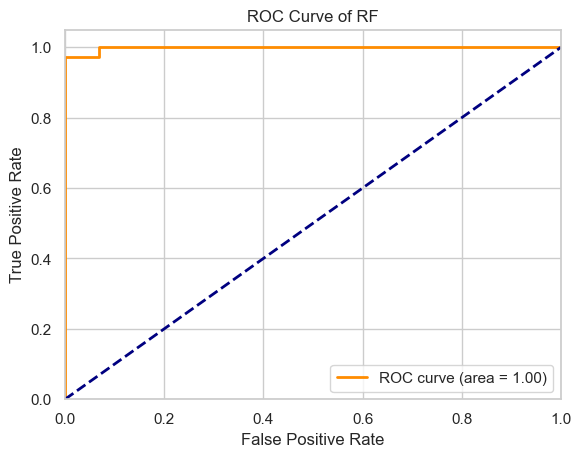

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = best_clf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RF')
plt.legend(loc="lower right")
plt.show()


In [62]:
feature_names = X_train.columns  # X is a pandas DataFrame with named columns

# Accessing the best estimator
best_model = grid_search.best_estimator_

# Getting feature importances
feature_importances = best_model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Printing the feature names along with their importance scores
print("Sorted Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

Sorted Feature Importances:
Dew point temperature(°C): 0.22095636363618168
Seasons_Autumn: 0.21470325844825597
Temperature(°C): 0.16798264208512312
Humidity(%): 0.10846481487441141
Wind speed (m/s): 0.0737721041881606
Visibility (10m): 0.05717275533577121
Seasons_Spring: 0.05219149396077593
Solar Radiation (MJ/m2): 0.04595997536249146
Month: 0.022056161268378935
Weekday: 0.021726522689260317
Seasons_Summer: 0.009565130971664353
Holiday: 0.0037873646080718994
WorkdayOrNot: 0.0008660100257404522
Seasons_Winter: 0.00048478453864811725
Rainfall(mm): 0.00029627737762903135
Snowfall (cm): 1.4340629435438146e-05


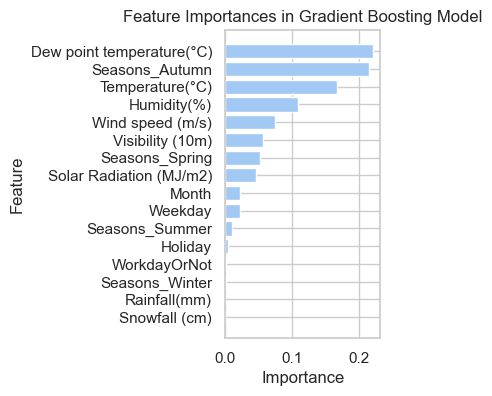

In [63]:
import matplotlib.pyplot as plt

# Sorting the feature importances in descending order and getting their indices
sorted_indices = feature_importances.argsort()[::-1]

# Creating labels for the x-axis by sorting feature names according to their importance
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Sorting the feature importances in descending order for plotting
sorted_importances = feature_importances[sorted_indices]

# Creating the horizontal bar chart
plt.figure(figsize=(2, 4))  # Adjust the figure size as needed
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)  # Use yticks instead of xticks
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Random Forest

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# setup a random forest model and 

rf_model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)
rf_model.fit(X_train_scaled, y_train)

train_accuracy = rf_model.score(X_train_scaled, y_train)
test_accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test_scaled)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")

Random Forest training score is 0.9592198581560284, test score is 0.9295774647887324
Random Forest's confusion matirx is:
[[70  2]
 [ 8 62]]
The AUC score for Random forest is 0.9295774647887324


### Tuning hyperparameters for RF

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7,10],
    'min_samples_leaf': [1, 2, 3, 4]
}

#  since our dataset is small, use cv = 5 to reduce overfitting
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
# adjusted Random Forest Model
rf_model=RandomForestClassifier(**grid_search.best_params_,random_state=42)
rf_model.fit(X_train_scaled, y_train)

train_accuracy = rf_model.score(X_train_scaled, y_train)
test_accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test_scaled)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")

report = metrics.classification_report(y_test, rf_model.predict(X_test_scaled))
print("Classification metrics for Random Forest model:")
print(report)

Random Forest training score is 1.0, test score is 0.9788732394366197
Random Forest's confusion matirx is:
[[72  0]
 [ 3 67]]
The AUC score for Random forest is 0.9788732394366197
Classification metrics for Random Forest model:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.96      0.98        70

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



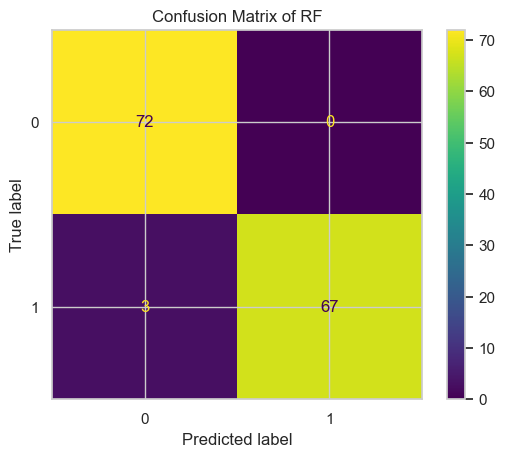

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test_scaled, y_test)
plt.title('Confusion Matrix of RF')
plt.show()

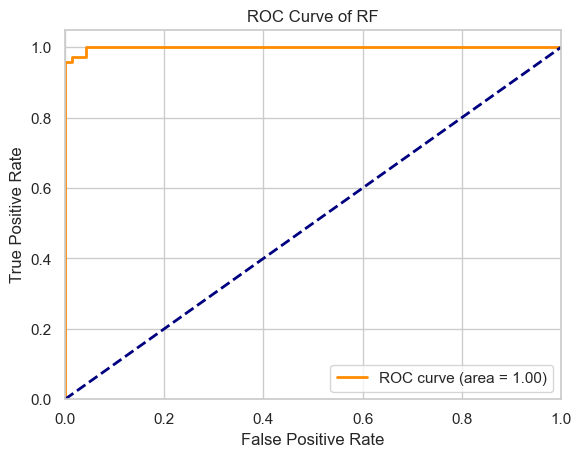

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = rf_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RF')
plt.legend(loc="lower right")
plt.show()


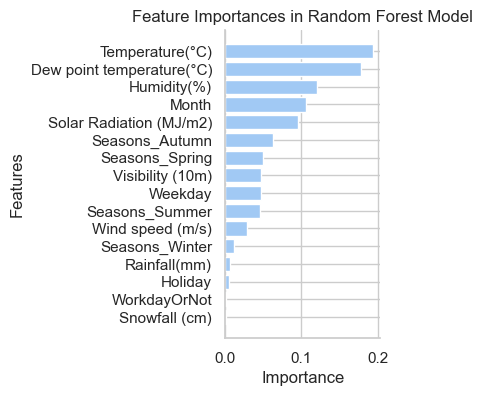

In [69]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_names

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(2, 4))
plt.title("Feature Importances in Random Forest Model")

# Adjust the plotting order by reversing the sorted indices for both features and their importances
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])

plt.gca().invert_yaxis()  # This line is now correctly used to flip the order
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Model Building for rented bike number prediction

## split data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
idx=seoulBike['functioning_day']==1
seoulBike.loc[idx, ]

month  workdayornot  hour  count  temperature  humidity  wind_speed  \
0        12             1     0    254         -5.2        37         2.2   
1        12             1     1    204         -5.5        38         0.8   
2        12             1     2    173         -6.0        39         1.0   
3        12             1     3    107         -6.2        40         0.9   
4        12             1     4     78         -6.0        36         2.3   
...     ...           ...   ...    ...          ...       ...         ...   
8755     11             1    19   1003          4.2        34         2.6   
8756     11             1    20    764          3.4        37         2.3   
8757     11             1    21    694          2.6        39         0.3   
8758     11             1    22    712          2.1        41         1.0   
8759     11             1    23    584          1.9        43         1.3   

      visibility  radiation  rainfall  snowfall  holiday  functioning_day  \
0           2000        0.0       0.0       0.0        0                1   
1           2000        0.0       0.0       0.0        0                1   
2           2000        0.0       0.0       0.0        0                1   
3           2000        0.0       0.0       0.0        0                1   
4           2000        0.0       0.0       0.0        0                1   
...          ...        ...       ...       ...      ...              ...   
8755        1894        0.0       0.0       0.0        0                1   
8756        2000        0.0       0.0       0.0        0                1   
8757        1968        0.0       0.0       0.0        0                1   
8758        1859        0.0       0.0       0.0        0                1   
8759        1909        0.0       0.0       0.0        0                1   

      seasons_Spring  seasons_Summer  seasons_Autumn  seasons_Winter  
0                  0               0               0               1  
1                  0               0               0               1  
2                  0               0               0               1  
3                  0               0               0               1  
4                  0               0               0               1  
...              ...             ...             ...             ...  
8755               0               0               1               0  
8756               0               0               1               0  
8757               0               0               1               0  
8758               0               0               1               0  
8759               0               0               1               0  

[8465 rows x 17 columns]

In [72]:
X=seoulBike.loc[idx, ].drop(['count', 'functioning_day'], axis=1)
y=np.sqrt(seoulBike.loc[idx, ]['count'])

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=33)
X_train.shape

(6772, 15)

In [74]:
X_test.shape

(1693, 15)

In [75]:
functioning_day=seoulBike.loc[idx, ].drop('functioning_day', axis=1)
X_train_df=pd.DataFrame(X_train)
X_test_df=pd.DataFrame(X_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

## scale data

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [77]:
X_train_reg = X_train
X_test_reg = X_test
y_train_reg = y_train
y_test_reg = y_test

In [78]:
X_test_reg

array([[-0.70594565,  0.63867066, -1.0909833 , ..., -0.59372257,
        -0.5459524 , -0.58598997],
       [-0.70594565, -1.56575222,  0.0647226 , ..., -0.59372257,
        -0.5459524 , -0.58598997],
       [-0.41561018,  0.63867066, -1.0909833 , ..., -0.59372257,
        -0.5459524 , -0.58598997],
       ...,
       [-1.57695209,  0.63867066,  0.0647226 , ..., -0.59372257,
        -0.5459524 ,  1.70651384],
       [-0.70594565,  0.63867066,  0.78703879, ..., -0.59372257,
        -0.5459524 , -0.58598997],
       [ 1.61673817,  0.63867066, -1.23544654, ..., -0.59372257,
        -0.5459524 ,  1.70651384]])

## performance metric

In [79]:
# empty list for appending performance metric score
model_result = []


def predict(ml_model, model_name):
    '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
    y_train_pred_original = np.power(y_train_pred, 2)
    y_test_pred_original = np.power(y_test_pred, 2)

    # graph --> best fit line on test data
    sns.regplot(x=y_test_pred, y=y_test, line_kws={'color': 'red'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    '''Evaluation metrics on train data'''
    train_MSE = round(mean_squared_error(y_train, y_train_pred), 3)
    train_RMSE = round(np.sqrt(train_MSE), 3)
    train_r2 = round(r2_score(y_train, y_train_pred), 3)
    train_MAE = round(mean_absolute_error(y_train, y_train_pred), 3)
    train_adj_r2 = round(
        1 - (1 - r2_score(y_train, y_train_pred)) *
        ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)),
        3)
    print(f'train MSE : {train_MSE}')
    print(f'train RMSE : {train_RMSE}')
    print(f'train MAE : {train_MAE}')
    print(f'train R2 : {train_r2}')
    print(f'train Adj R2 : {train_adj_r2}')
    print('-' * 150)
    '''Evaluation metrics on test data'''
    test_MSE = round(mean_squared_error(y_test, y_test_pred), 3)
    test_RMSE = round(np.sqrt(test_MSE), 3)
    test_r2 = round(r2_score(y_test, y_test_pred), 3)
    test_MAE = round(mean_absolute_error(y_test, y_test_pred), 3)
    test_adj_r2 = round(
        1 - (1 - r2_score(y_test, y_test_pred)) *
        ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 3)
    print(f'test MSE : {test_MSE}')
    print(f'test RMSE : {test_RMSE}')
    print(f'test MAE : {test_MAE}')
    print(f'test R2 : {test_r2}')
    print(f'test Adj R2 : {test_adj_r2}')
    print('-' * 150)

    # graph --> actual vs predicted on test data
    plt.figure(figsize=(6, 5))
    plt.plot((y_test_pred)[:20])
    plt.plot(np.array((y_test)[:20]))
    plt.legend(["Predicted", "Actual"])
    plt.xlabel('Test Data on last 20 points')
    plt.show()
    print('-' * 150)
    '''actual vs predicted value on test data'''
    d = {
        'y_actual': y_test,
        'y_predict': y_test_pred,
        'error': y_test - y_test_pred
    }
    print(pd.DataFrame(data=d).head().T)
    print('-' * 150)

    # using the score from the performance metrics to create the final model_result.
    model_result.append({
        'model': model_name,
        'train MSE': train_MSE,
        'test MSE': test_MSE,
        'train RMSE': train_RMSE,
        'test RMSE': test_RMSE,
        'train MAE': train_MAE,
        'test MAE': test_MAE,
        'train R2': train_r2,
        'test R2': test_r2,
        'train Adj R2': train_adj_r2,
        'test Adj R2': test_adj_r2
    })

## model implementation

### Linera regression


train MSE : 53.033
train RMSE : 7.282
train MAE : 5.613
train R2 : 0.624
train Adj R2 : 0.623
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 54.85
test RMSE : 7.406
test MAE : 5.616
test R2 : 0.606
test Adj R2 : 0.602
------------------------------------------------------------------------------------------------------------------------------------------------------


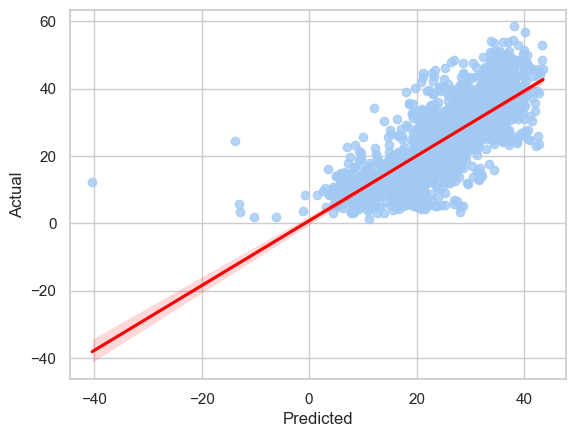

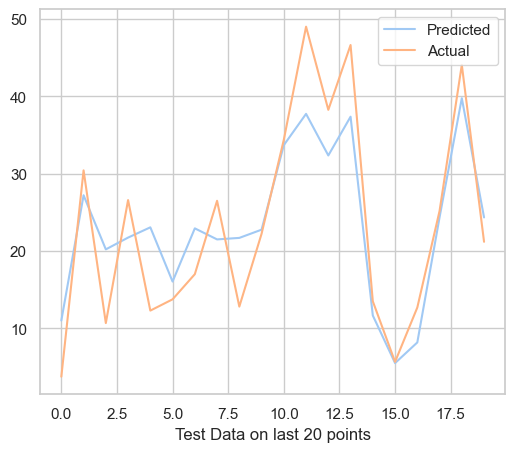

------------------------------------------------------------------------------------------------------------------------------------------------------
                2980       2916       3820       7536       1723
y_actual    3.741657  30.430248  10.677078  26.589472  12.288206
y_predict  11.007204  27.210329  20.210329  21.733766  23.061891
error      -7.265547   3.219919  -9.533251   4.855705 -10.773686
------------------------------------------------------------------------------------------------------------------------------------------------------


In [83]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression(), 'LinearRegression')

### Linear mixed effect model


In [84]:
import statsmodels.api as sm

In [85]:
functioning_day_train=functioning_day.loc[X_train_df.index, ]
functioning_day_test=functioning_day.loc[X_test_df.index, ]
functioning_day_train.columns

Index(['month', 'workdayornot', 'hour', 'count', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'radiation', 'rainfall', 'snowfall',
       'holiday', 'seasons_Spring', 'seasons_Summer', 'seasons_Autumn',
       'seasons_Winter'],
      dtype='object')

MLE fit on training data

In [86]:
functioning_day_train_melt=pd.melt(functioning_day_train, value_vars=['month', 'workdayornot', 'hour'], id_vars=functioning_day.loc[:, 'count': 'snowfall'].columns.tolist(), var_name="variable" )
functioning_day_train_melt.head()


count  temperature  humidity  wind_speed  visibility  radiation  rainfall  \
0    206         18.0        85         1.1         411       0.45       0.0   
1   1836         31.1        64         2.7        1770       0.02       0.0   
2     20         17.5        95         2.0        1214       0.35       3.5   
3   1117         26.8        65         2.0         732       2.37       0.0   
4     92         -2.5        31         1.4        1996       0.00       0.0   

   snowfall variable  value  
0       0.0    month      5  
1       0.0    month      8  
2       0.0    month     10  
3       0.0    month      6  
4       0.0    month      2

In [87]:
lme=sm.MixedLM(np.sqrt(functioning_day_train_melt['count']), sm.add_constant(functioning_day_train_melt.loc[:, "temperature":"snowfall"]), groups=functioning_day_train_melt['variable'])
lme_fit=lme.fit()
lme_fit.summary()

C:\Users\Yahan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Yahan\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Yahan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Yahan\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\Yahan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: count      
No. Observations: 20316   Method:             REML       
No. Groups:       3       Scale:              70.4840    
Min. group size:  6772    Log-Likelihood:     -72079.3001
Max. group size:  6772    Converged:          No         
Mean group size:  6772.0                                 
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
const         26.626    0.636  41.884 0.000 25.380 27.872
temperature    0.692    0.006 114.082 0.000  0.680  0.704
humidity      -0.199    0.004 -44.485 0.000 -0.208 -0.190
wind_speed     0.665    0.062  10.702 0.000  0.543  0.787
visibility     0.000    0.000   2.070 0.038  0.000  0.000
radiation     -1.499    0.093 -16.073 0.000 -1.682 -1.316
rainfall      -1.641    0.059 -27.885 0.000 -1.756 -1.526
snowfall       0.271    0.138   1.970 0.049  0.001  0.541
Group Var      0.716                                     
=========================================================

"""

In [88]:
lme_fit.k_fe

8

In [89]:
print("Train MSE:", np.mean(lme_fit.resid**2))

Train MSE: 70.45621510062351


test on functioning_day_test(problem here)

In [90]:
functioning_day_test_melt=pd.melt(functioning_day_test, value_vars=['month', 'workdayornot', 'hour'], id_vars=functioning_day.loc[:, 'count': 'snowfall'].columns.tolist(), var_name="variable" )
functioning_day_test_melt.head()

count  temperature  humidity  wind_speed  visibility  radiation  rainfall  \
0     14         14.1        97         1.7         306       0.00       3.0   
1    926         18.0        53         3.1        1350       1.53       0.0   
2    114         10.0        64         1.5        2000       0.00       0.0   
3    707          7.9        53         0.9        2000       0.00       0.0   
4    151         -3.1        14         5.1        2000       0.00       0.0   

   snowfall variable  value  
0       0.0    month      4  
1       0.0    month      4  
2       0.0    month      5  
3       0.0    month     10  
4       0.0    month      2

In [91]:
predictions=lme_fit.predict(functioning_day_test_melt.loc[:, ['temperature',	'humidity',	'wind_speed',	'visibility',	'radiation',	'rainfall',	'snowfall',	'value']])

In [92]:
test_mse=np.mean((predictions-np.sqrt(functioning_day_test.loc[:, 'count']))**2)

In [93]:
test_mse

1970540.0222994252

### GAM

In [94]:
X_train_df.head()

month  workdayornot  hour  temperature  humidity  wind_speed  \
3659      5             1    11         18.0        85         1.1   
5996      8             1    20         31.1        64         2.7   
7427     10             0    11         17.5        95         2.0   
5053      6             1    13         26.8        65         2.0   
1847      2             1    23         -2.5        31         1.4   

      visibility  radiation  rainfall  snowfall  holiday  seasons_Spring  \
3659         411       0.45       0.0       0.0        0               1   
5996        1770       0.02       0.0       0.0        0               0   
7427        1214       0.35       3.5       0.0        0               0   
5053         732       2.37       0.0       0.0        0               0   
1847        1996       0.00       0.0       0.0        1               0   

      seasons_Summer  seasons_Autumn  seasons_Winter  
3659               0               0               0  
5996               1               0               0  
7427               0               1               0  
5053               1               0               0  
1847               0               0               1

In [95]:
!pip install pygam
from pygam import GAM, s

# Assuming X_train and y_train are your training data
# Define the GAM model with spline basis functions for each feature
gam = GAM(s(3) + s(4) + s(5) )

# Fit the GAM to the training data
gam.fit(X_train, y_train)

# Print model summary if needed
print(gam.summary())

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     45.0018
Link Function:                     IdentityLink Log Likelihood:                                -33961.0868
Number of Samples:                         6772 AIC:                                            68014.1773
                                                AICc:                                           68014.8203
                                                GCV:                                               60.3211
                                                Scale:                                                59.6
                                                Pseudo R-Squared:                                   0.5799
Feature Function                  Lam

In [96]:
X_train

array([[-0.41561018,  0.63867066, -0.07974064, ..., -0.59372257,
        -0.5459524 , -0.58598997],
       [ 0.45539626,  0.63867066,  1.22042851, ...,  1.68428834,
        -0.5459524 , -0.58598997],
       [ 1.03606721, -1.56575222, -0.07974064, ..., -0.59372257,
         1.83166152, -0.58598997],
       ...,
       [ 0.45539626,  0.63867066,  0.64257555, ...,  1.68428834,
        -0.5459524 , -0.58598997],
       [-0.99628113,  0.63867066,  0.49811232, ..., -0.59372257,
        -0.5459524 , -0.58598997],
       [ 1.03606721,  0.63867066,  0.0647226 , ..., -0.59372257,
         1.83166152, -0.58598997]])

### KNN

train MSE : 11.56
train RMSE : 3.4
train MAE : 2.303
train R2 : 0.918
train Adj R2 : 0.918
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 23.128
test RMSE : 4.809
test MAE : 3.373
test R2 : 0.834
test Adj R2 : 0.832
------------------------------------------------------------------------------------------------------------------------------------------------------


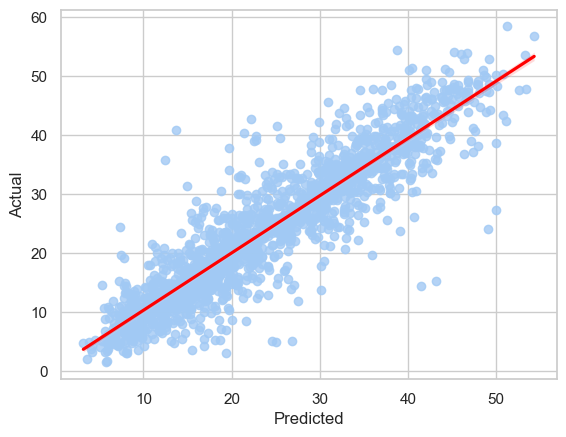

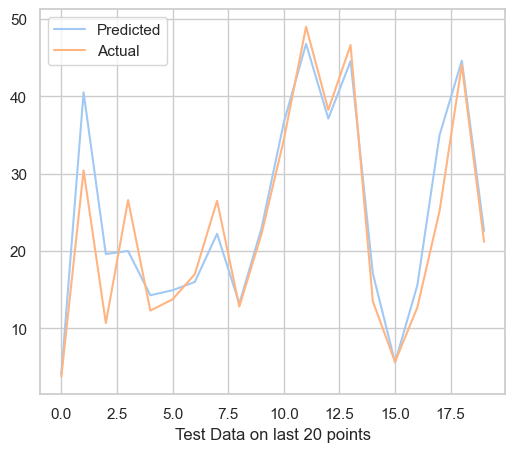

------------------------------------------------------------------------------------------------------------------------------------------------------
               2980       2916       3820       7536       1723
y_actual   3.741657  30.430248  10.677078  26.589472  12.288206
y_predict  4.051142  40.523868  19.611254  20.003965  14.276460
error     -0.309484 -10.093619  -8.934176   6.585506  -1.988255
------------------------------------------------------------------------------------------------------------------------------------------------------


In [97]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

### SVM regression

train MSE : 17.797
train RMSE : 4.219
train MAE : 2.576
train R2 : 0.874
train Adj R2 : 0.873
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 22.074
test RMSE : 4.698
test MAE : 3.108
test R2 : 0.841
test Adj R2 : 0.84
------------------------------------------------------------------------------------------------------------------------------------------------------


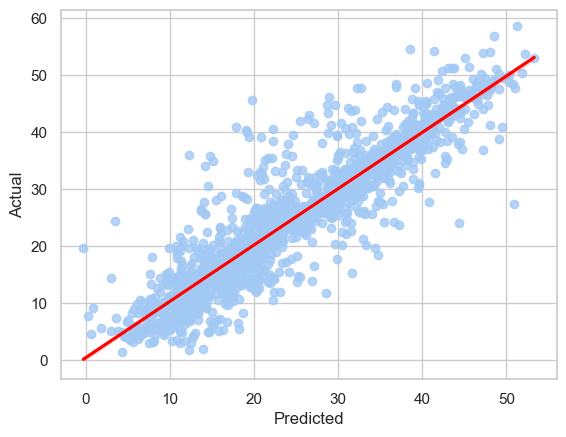

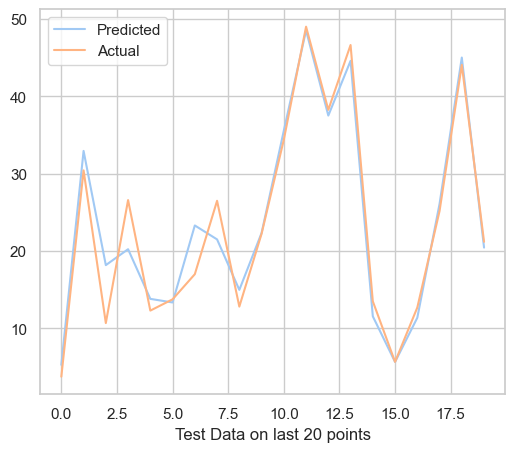

------------------------------------------------------------------------------------------------------------------------------------------------------
               2980       2916       3820       7536       1723
y_actual   3.741657  30.430248  10.677078  26.589472  12.288206
y_predict  5.270845  32.946211  18.172165  20.231152  13.807035
error     -1.529188  -2.515963  -7.495087   6.358320  -1.518830
------------------------------------------------------------------------------------------------------------------------------------------------------


In [100]:
predict(SVR(kernel='rbf',C=100), 'SVM')

### decision tree

train MSE : 13.395
train RMSE : 3.66
train MAE : 2.467
train R2 : 0.905
train Adj R2 : 0.905
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 16.915
test RMSE : 4.113
test MAE : 2.836
test R2 : 0.878
test Adj R2 : 0.877
------------------------------------------------------------------------------------------------------------------------------------------------------


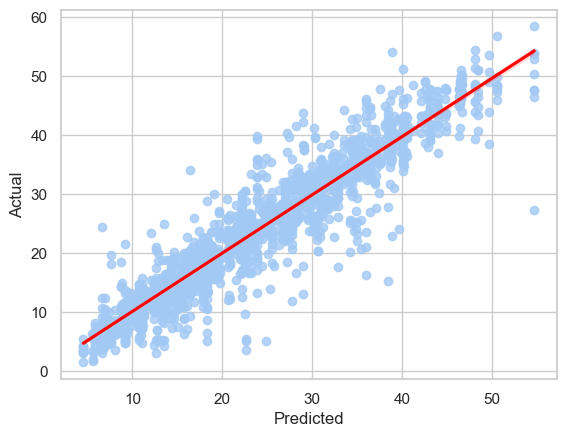

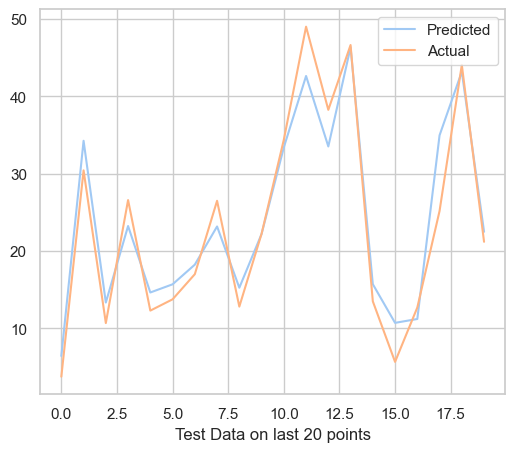

------------------------------------------------------------------------------------------------------------------------------------------------------
               2980       2916       3820       7536       1723
y_actual   3.741657  30.430248  10.677078  26.589472  12.288206
y_predict  6.418667  34.257892  13.332138  23.230407  14.632775
error     -2.677010  -3.827644  -2.655060   3.359064  -2.344569
------------------------------------------------------------------------------------------------------------------------------------------------------


In [101]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

### random forest

train MSE : 3.522
train RMSE : 1.877
train MAE : 1.17
train R2 : 0.975
train Adj R2 : 0.975
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 9.785
test RMSE : 3.128
test MAE : 2.07
test R2 : 0.93
test Adj R2 : 0.929
------------------------------------------------------------------------------------------------------------------------------------------------------


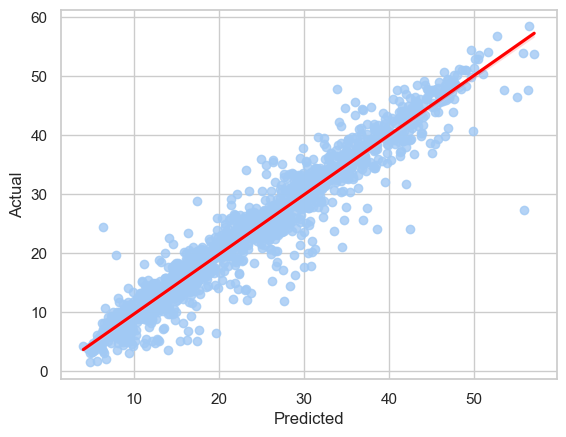

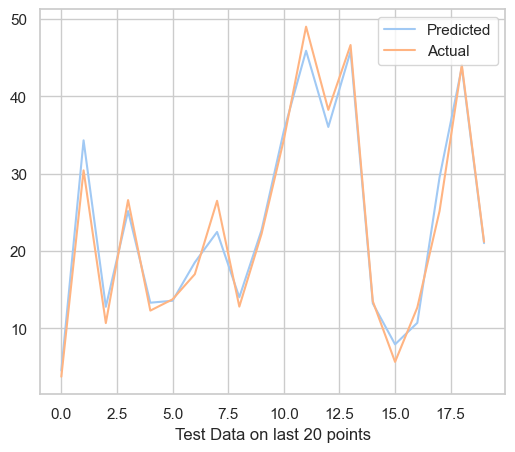

------------------------------------------------------------------------------------------------------------------------------------------------------
               2980       2916       3820       7536       1723
y_actual   3.741657  30.430248  10.677078  26.589472  12.288206
y_predict  4.534928  34.315355  12.781859  25.167270  13.311991
error     -0.793270  -3.885107  -2.104780   1.422201  -1.023785
------------------------------------------------------------------------------------------------------------------------------------------------------


In [102]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model
predict(rf_optimal_model, 'Random Forest')

In [103]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80, random_state=42)

feature importance

In [104]:
importances = rf_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
3      temperature            0.372715
2             hour            0.317505
4         humidity            0.093413
8         rainfall            0.079202
13  seasons_Autumn            0.034597
1     workdayornot            0.026657
7        radiation            0.026354
0            month            0.014022
6       visibility            0.010096
5       wind_speed            0.007529
14  seasons_Winter            0.006456
11  seasons_Spring            0.004166
10         holiday            0.003614
12  seasons_Summer            0.001939
9         snowfall            0.001737

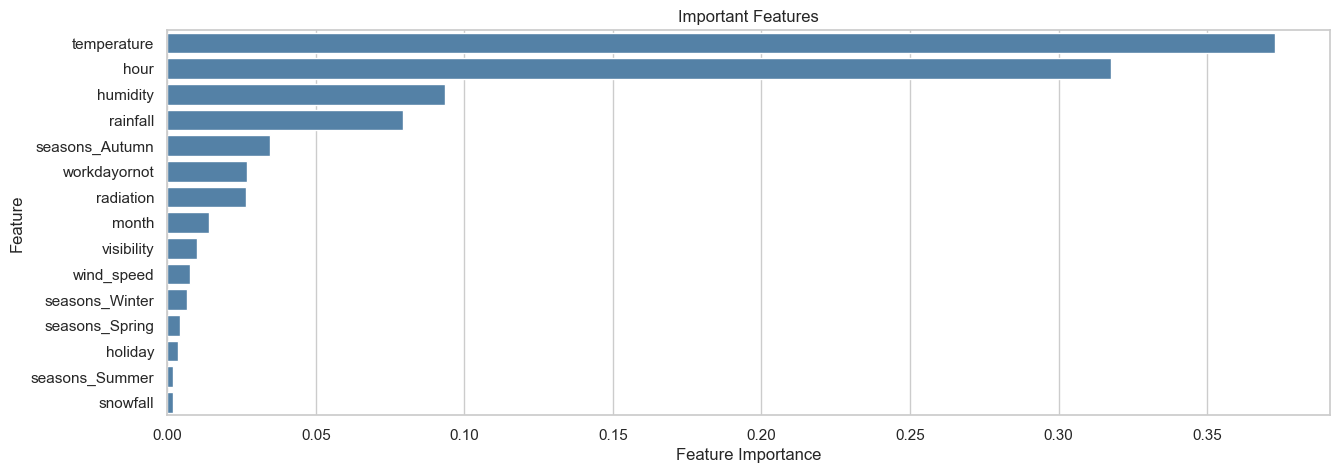

In [105]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='steelblue')
bar.set_title('Important Features')
plt.show()

### XGboost

### Note: XGBoost grid search requires significant computational resources and may lead to Jupyter Notebook kernel restarts.
### Please configure sufficient memory before running.

In [ ]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],             # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

In [ ]:
predict(xgb_optimal_model, 'XGB')

### light GBM

### Note: LightGBM grid search requires significant computational resources and may lead to Jupyter Notebook kernel restarts.
### Please configure sufficient memory before running.

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
param_grid = {'n_estimators': [600,800],     # number of trees in the ensemble
             'max_depth': [8,10],
              'num_leaves':[10, 20, 30]}# maximum number of levels allowed in each tree.


# Initialize the RandomForestRegressor model
lgb = LGBMRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

In [ ]:
predict(lgb_optimal_model, 'LGB')

original y data and predicted y data

## LSTM

### Note: Before running the code in this section, please move all files from the directory `my_dir` to the current directory. The data inside contains the optimized hyperparameters for the LSTM model. 

### You can find the supporting files `my_dir` in https://github.com/Isawsomethingb4/Seoul-Bike-Sharing-Demand-Analysis.git

Since we use the square root of rented bike count of our target variable, before using LSTM, we need to check whether the data transform changed seasonal.

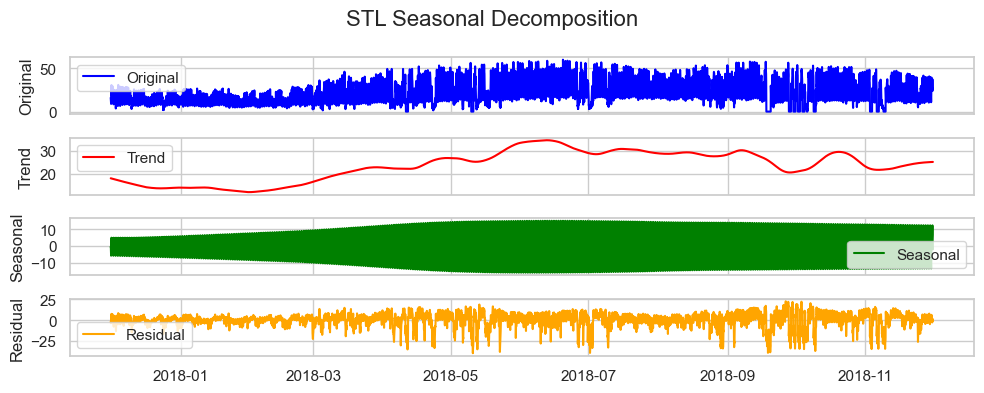

In [61]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# The data after square transformation.

stl = sm.tsa.STL(seoulBike_transformed['Rented Bike Count']**(1/2), period=24, trend=31*24+1, seasonal = 24 * 7 + 1)
result = stl.fit()

trend2 = result.trend
seasonal2 = result.seasonal
residual2 = result.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 4), sharex=True)

axes[0].plot(seoulBike_transformed.index, seoulBike_transformed["Rented Bike Count"]**(1/2), label='Original', color='blue')
axes[0].set_ylabel('Original', fontsize=12)
axes[0].legend()

axes[1].plot(seoulBike_transformed.index, trend2, label='Trend', color='red')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].legend()

axes[2].plot(seoulBike_transformed.index, seasonal2, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].legend()

axes[3].plot(seoulBike_transformed.index, residual2, label='Residual', color='orange')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].legend()

fig.suptitle('STL Seasonal Decomposition', fontsize=16)

plt.tight_layout()
plt.show()

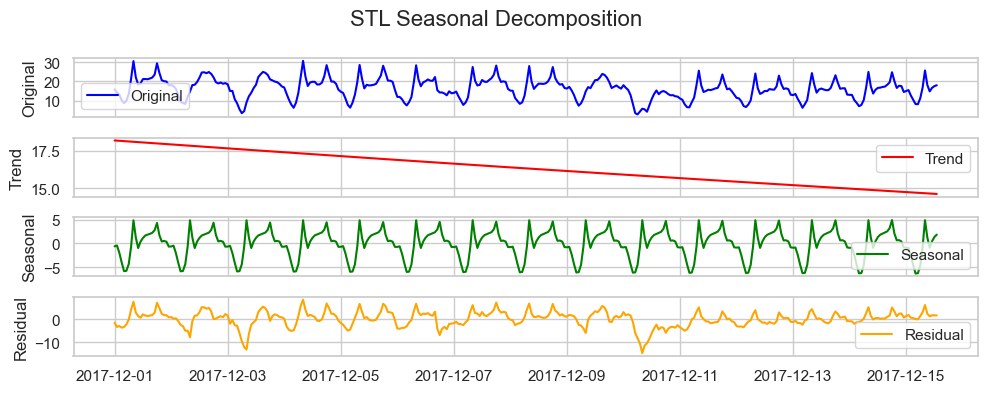

In [62]:
# Data is too dense to discern seasonal clearly. plot the graph of first two weeks
limit = 350
fig, axes = plt.subplots(4, 1, figsize=(10, 4), sharex=True)


axes[0].plot(seoulBike_transformed.index[:limit], seoulBike_transformed["Rented Bike Count"].iloc[:limit]**(1/2), label='Original', color='blue')
axes[0].set_ylabel('Original', fontsize=12)
axes[0].legend()

axes[1].plot(seoulBike_transformed.index[:limit], trend2[:limit], label='Trend', color='red')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].legend()

axes[2].plot(seoulBike_transformed.index[:limit], seasonal2[:limit], label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].legend()

axes[3].plot(seoulBike_transformed.index[:limit], residual2[:limit], label='Residual', color='orange')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].legend()

fig.suptitle('STL Seasonal Decomposition', fontsize=16)

plt.tight_layout()
plt.show()

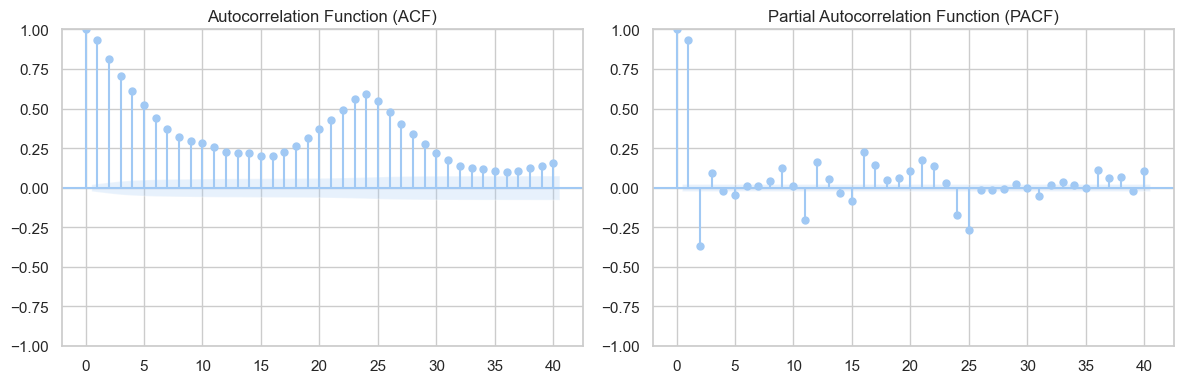

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 绘制ACF图
plot_acf(seoulBike_transformed['Rented Bike Count']**(1/2), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# 绘制PACF图
plot_pacf(seoulBike_transformed['Rented Bike Count']**(1/2), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# 调整子图之间的间距
plt.tight_layout()
plt.show()


### LSTM Model Building

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.layers import Dropout

seoulBike_data = seoulBike_eda.copy()
seoulBike_data
#seoulBike_data["Holiday"] = seoulBike_data["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
#seoulBike_data["Functioning Day"] = seoulBike_data["Functioning Day"].replace({'No': 0, 'Yes': 1})
seoulBike_data = pd.get_dummies(seoulBike_data, columns=["Seasons","Holiday","Functioning Day"], drop_first=True)
seoulBike_data.head()

Date Month Weekday WorkdayOrNot  Hour  Rented Bike Count  \
0 2017-12-01    12       4            1     0                254   
1 2017-12-01    12       4            1     1                204   
2 2017-12-01    12       4            1     2                173   
3 2017-12-01    12       4            1     3                107   
4 2017-12-01    12       4            1     4                 78   

   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Summer  Seasons_Autumn  Seasons_Winter  \
0            0.0               0               0               1   
1            0.0               0               0               1   
2            0.0               0               0               1   
3            0.0               0               0               1   
4            0.0               0               0               1   

   Holiday_No Holiday  Functioning Day_Yes  
0                   1                    1  
1                   1                    1  
2                   1                    1  
3                   1                    1  
4                   1                    1

In [50]:
# To keep time continous, we cannot remove non-functioning days' rented bike count.
# Add function day as remark
features = seoulBike_data.drop(['Rented Bike Count',"Date"], axis=1)
target = seoulBike_data['Rented Bike Count']**(1/2)

scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(features)
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

look_back = 24  # using the data from the past 24 hours as input.

# The function for creating time series datasets needs to be adjusted to maintain data at the hourly level.
def create_dataset(X, Y, look_back=24):
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)

# Use the `create_dataset` function to prepare the data.
allX, allY = create_dataset(X_scaled, y_scaled, look_back)

# Randomly split the entire dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(allX, allY, test_size=0.2, random_state=42)


print(allX.shape)
print(allY.shape)

(8736, 24, 17)
(8736, 1)


In [51]:
import random
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

from kerastuner import RandomSearch
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=500, step=50), return_sequences=True, input_shape=(look_back, 
                                                                                                                    X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=500, step=50), return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Reloading Tuner from my_dir\lstm_tuning\tuner0.json


In [52]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print('Best units:', best_hps.get('units'))
print('Best Dropout rate:', best_hps.get('dropout'))

Best units: 150
Best Dropout rate: 0.30000000000000004


In [53]:
best_model = tuner.get_best_models(num_models=1)[0]


best_hps = tuner.get_best_hyperparameters()[0]

# Print all the best hyperparameters.
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

# Print the architecture of the best model.
best_model.summary()




units: 150
dropout: 0.30000000000000004
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 150)           100800    
                                                                 
 dropout (Dropout)           (None, 24, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 281551 (1.07 MB)
Trainable params: 281551 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
best_model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=2)

# predict
trainPredict = best_model.predict(X_train)
testPredict = best_model.predict(X_test)

# Reverse scaling.
trainPredict = scaler_y.inverse_transform(trainPredict)
testPredict = scaler_y.inverse_transform(testPredict)
trainY_inv = scaler_y.inverse_transform(y_train)
testY_inv = scaler_y.inverse_transform(y_test)

# MSE 
trainScore = mean_squared_error(trainY_inv, trainPredict)
testScore = mean_squared_error(testY_inv, testPredict)
print('Train Score: %.2f MSE' % (trainScore))
print('Test Score: %.2f MSE' % (testScore))

# RMSE 
trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

# MAE 
trainMAE = mean_absolute_error(trainY_inv, trainPredict)
testMAE = mean_absolute_error(testY_inv, testPredict)
print('Train Score: %.2f MAE' % (trainMAE))
print('Test Score: %.2f MAE' % (testMAE))

# R² 
trainR2 = r2_score(trainY_inv, trainPredict)
testR2 = r2_score(testY_inv, testPredict)
print('Train R2 Score:', trainR2)
print('Test R2 Score:', testR2)

Epoch 1/50

280/280 - 11s - loss: 0.0026 - 11s/epoch - 38ms/step
Epoch 2/50
280/280 - 7s - loss: 0.0024 - 7s/epoch - 27ms/step
Epoch 3/50
280/280 - 7s - loss: 0.0021 - 7s/epoch - 27ms/step
Epoch 4/50
280/280 - 7s - loss: 0.0020 - 7s/epoch - 27ms/step
Epoch 5/50
280/280 - 8s - loss: 0.0019 - 8s/epoch - 27ms/step
Epoch 6/50
280/280 - 8s - loss: 0.0019 - 8s/epoch - 28ms/step
Epoch 7/50
280/280 - 8s - loss: 0.0020 - 8s/epoch - 28ms/step
Epoch 8/50
280/280 - 8s - loss: 0.0018 - 8s/epoch - 28ms/step
Epoch 9/50
280/280 - 8s - loss: 0.0019 - 8s/epoch - 28ms/step
Epoch 10/50
280/280 - 8s - loss: 0.0017 - 8s/epoch - 28ms/step
Epoch 11/50
280/280 - 8s - loss: 0.0018 - 8s/epoch - 28ms/step
Epoch 12/50
280/280 - 8s - loss: 0.0016 - 8s/epoch - 29ms/step
Epoch 13/50
280/280 - 8s - loss: 0.0016 - 8s/epoch - 28ms/step
Epoch 14/50
280/280 - 8s - loss: 0.0016 - 8s/epoch - 28ms/step
Epoch 15/50
280/280 - 8s - loss: 0.0016 - 8s/epoch - 28ms/step
Epoch 16/50
280/280 - 8s - loss: 0.0015 - 8s/epoch - 28ms/ste

In [55]:
# predict
trainPredict = best_model.predict(X_train)
testPredict = best_model.predict(X_test)

# Reverse scaling the predicted values and true y-values, restoring them from the normalized scale to the scale after square transformation.
trainPredict_transformed_back = scaler_y.inverse_transform(trainPredict)
testPredict_transformed_back = scaler_y.inverse_transform(testPredict)
y_train_transformed_back = scaler_y.inverse_transform(y_train)
y_test_transformed_back = scaler_y.inverse_transform(y_test)

# Restore from the scale after square transformation to the original scale by squaring the predicted values and true y-values.
trainPredict_original = np.square(trainPredict_transformed_back)
testPredict_original = np.square(testPredict_transformed_back)
y_train_original = np.square(y_train_transformed_back)
y_test_original = np.square(y_test_transformed_back)


# Calculate MSE (restored version)
trainScore_mse = mean_squared_error(y_train_original, trainPredict_original)
testScore_mse = mean_squared_error(y_test_original, testPredict_original)
print('Train Score: %.2f MSE' % (trainScore_mse))
print('Test Score: %.2f MSE' % (testScore_mse))

# Calculate RMSE (restored version)
trainScore = np.sqrt(mean_squared_error(y_train_original, trainPredict_original))
testScore = np.sqrt(mean_squared_error(y_test_original, testPredict_original))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

# Calculate MAE (restored version)
trainMAE = mean_absolute_error(y_train_original, trainPredict_original)
testMAE = mean_absolute_error(y_test_original, testPredict_original)
print('Train Score: %.2f MAE' % (trainMAE))
print('Test Score: %.2f MAE' % (testMAE))

# Calculate R² (restored version)
trainR2 = r2_score(y_train_original, trainPredict_original)
testR2 = r2_score(y_test_original, testPredict_original)
print('Train R2 Score:', trainR2)
print('Test R2 Score:', testR2)

55/55 [==============================] - 1s 13ms/step
Train Score: 7023.03 MSE
Test Score: 15690.67 MSE
Train Score: 83.80 RMSE
Test Score: 125.26 RMSE
Train Score: 51.19 MAE
Test Score: 68.21 MAE
Train R2 Score: 0.9833137330087014
Test R2 Score: 0.9607838751742289


273/273 [==============================] - 4s 14ms/step


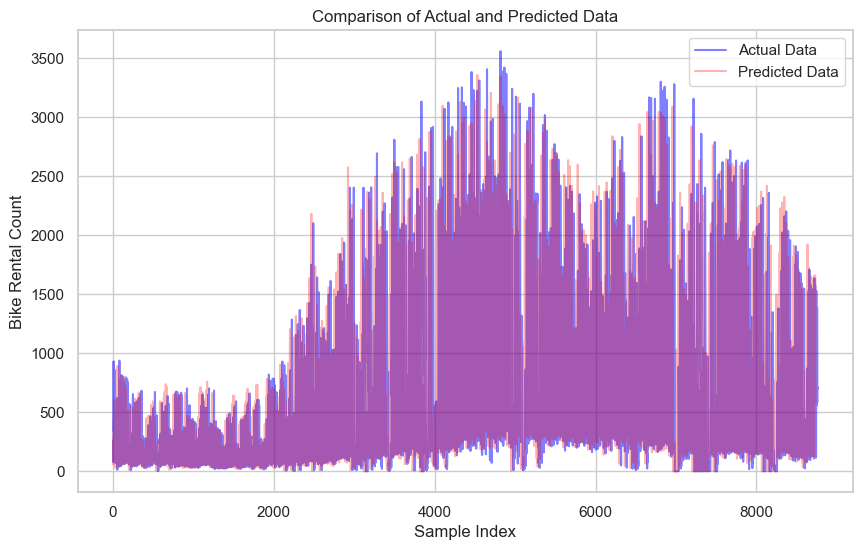

In [56]:
allPredict = best_model.predict(allX)

allPredict_transformed_back = scaler_y.inverse_transform(allPredict)

allPredict_original = np.square(allPredict_transformed_back)

y_all_original = seoulBike_data["Rented Bike Count"].values.reshape(-1,1)

plt.figure(figsize=(10, 6))
plt.plot(y_all_original.flatten(), label='Actual Data', color='blue', alpha=0.5)
plt.plot(allPredict_original.flatten(), label='Predicted Data', color='red', alpha=0.3)
plt.title('Comparison of Actual and Predicted Data')
plt.xlabel('Sample Index')
plt.ylabel('Bike Rental Count')
plt.legend()
plt.show()

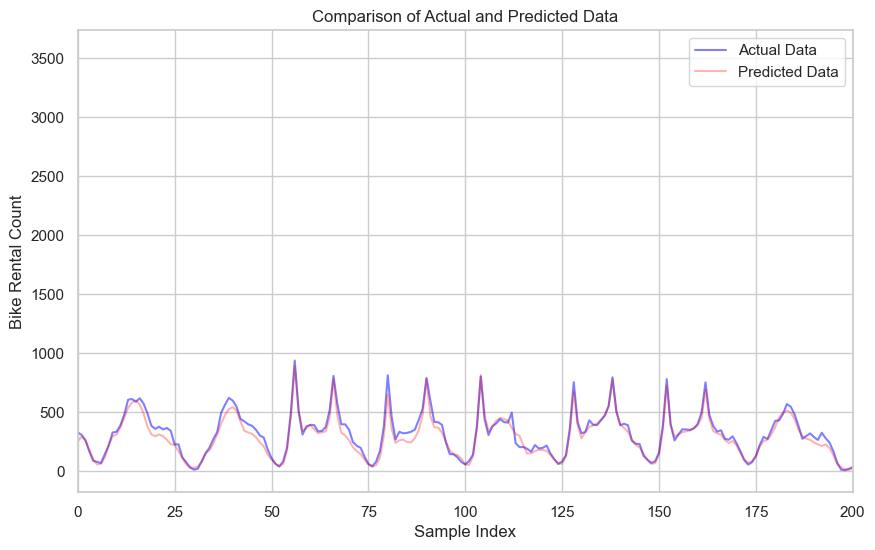

In [57]:
look_back = 24
plt.figure(figsize=(10, 6))
plt.plot(y_all_original[look_back:].flatten(), label='Actual Data', color='blue', alpha=0.5)
plt.plot(allPredict_original.flatten(), label='Predicted Data', color='red', alpha=0.3)
plt.title('Comparison of Actual and Predicted Data')
plt.xlabel('Sample Index')
plt.ylabel('Bike Rental Count')
plt.legend()

plt.xlim(0, 200)

plt.show()

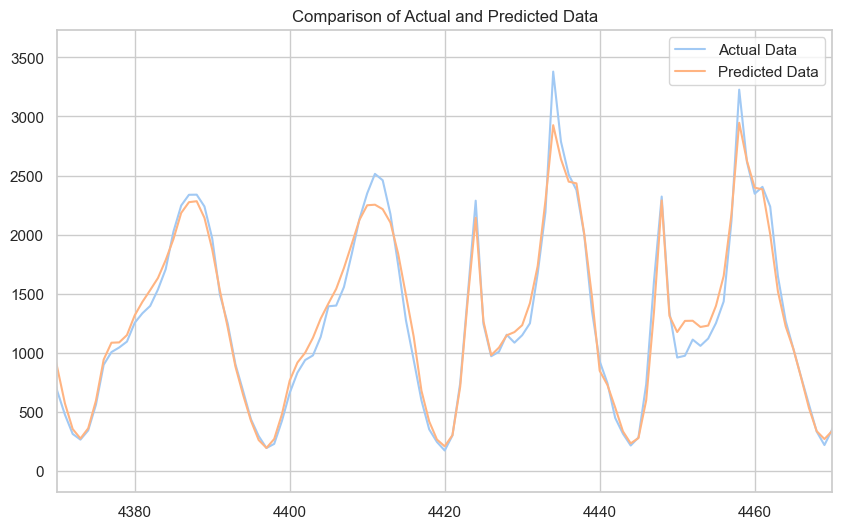

In [58]:
plt.figure(figsize=(10, 6))
# plt.plot(y_all_original[look_back:].flatten(), label='Actual Data', color='blue', alpha=0.5)
# plt.plot(allPredict_original.flatten(), label='Predicted Data', color='red', alpha=0.3)
plt.plot(y_all_original[look_back:].flatten(), label='Actual Data')
plt.plot(allPredict_original.flatten(), label='Predicted Data')
plt.title('Comparison of Actual and Predicted Data')
plt.legend()

plt.xlim(4370,4470)

plt.show()

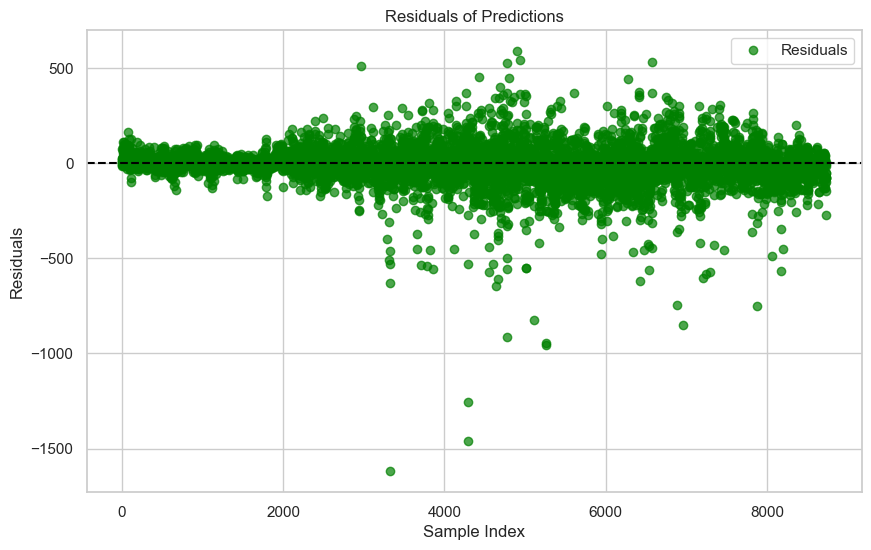

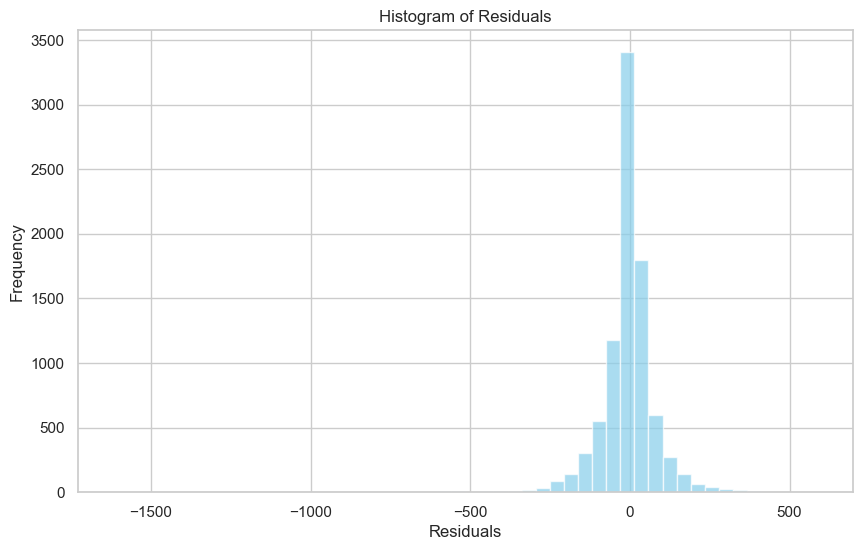

In [59]:
# Assume look_back is the sliding window size you used for creating the dataset
look_back = 24

# Since the number of predicted values is fewer than the original target values, we need to adjust the original target values array accordingly
# Trim the first look_back values from the original target values
y_all_original_adjusted = y_all_original[look_back:]

# Ensure the adjusted original target values array matches the length of the predicted values array
assert len(y_all_original_adjusted) == len(allPredict_original), "The adjusted original and predicted arrays do not match in length."

# Now calculate the residuals
residuals = y_all_original_adjusted.flatten() - allPredict_original.flatten()

# The following plotting code remains unchanged
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='green', marker='o', linestyle='none', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')  # Plot the reference line y=0
plt.title('Residuals of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Optional: Plot a histogram of residuals to visualize their distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# LSTM model adjust: add trend and season into traing data

In [66]:
seoulBike_data_ts = seoulBike_data.copy()
seoulBike_data_ts["trend"] = trend2.values
seoulBike_data_ts["seasonal"] = seasonal2.values
seoulBike_data_ts

Date Month Weekday WorkdayOrNot  Hour  Rented Bike Count  \
0    2017-12-01    12       4            1     0                254   
1    2017-12-01    12       4            1     1                204   
2    2017-12-01    12       4            1     2                173   
3    2017-12-01    12       4            1     3                107   
4    2017-12-01    12       4            1     4                 78   
...         ...   ...     ...          ...   ...                ...   
8755 2018-11-30    11       4            1    19               1003   
8756 2018-11-30    11       4            1    20                764   
8757 2018-11-30    11       4            1    21                694   
8758 2018-11-30    11       4            1    22                712   
8759 2018-11-30    11       4            1    23                584   

      Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  ...  \
0                -5.2           37               2.2              2000  ...   
1                -5.5           38               0.8              2000  ...   
2                -6.0           39               1.0              2000  ...   
3                -6.2           40               0.9              2000  ...   
4                -6.0           36               2.3              2000  ...   
...               ...          ...               ...               ...  ...   
8755              4.2           34               2.6              1894  ...   
8756              3.4           37               2.3              2000  ...   
8757              2.6           39               0.3              1968  ...   
8758              2.1           41               1.0              1859  ...   
8759              1.9           43               1.3              1909  ...   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Summer  \
0                         0.0           0.0            0.0               0   
1                         0.0           0.0            0.0               0   
2                         0.0           0.0            0.0               0   
3                         0.0           0.0            0.0               0   
4                         0.0           0.0            0.0               0   
...                       ...           ...            ...             ...   
8755                      0.0           0.0            0.0               0   
8756                      0.0           0.0            0.0               0   
8757                      0.0           0.0            0.0               0   
8758                      0.0           0.0            0.0               0   
8759                      0.0           0.0            0.0               0   

      Seasons_Autumn  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  \
0                  0               1                   1                    1   
1                  0               1                   1                    1   
2                  0               1                   1                    1   
3                  0               1                   1                    1   
4                  0               1                   1                    1   
...              ...             ...                 ...                  ...   
8755               1               0                   1                    1   
8756               1               0                   1                    1   
8757               1               0                   1                    1   
8758               1               0                   1                    1   
8759               1               0                   1                    1   

          trend  seasonal  
0     18.175483 -0.623615  
1     18.164403 -0.445125  
2     18.153327 -1.982175  
3     18.142255 -4.037305  
4     18.131186 -5.875050  
...         ...       ...  
8755  25.130790  6.196921  
8756  25.132653  3.170929  
8757  25.134504  2.360144  
8758  25.136343  1.

In [67]:
features2 = seoulBike_data_ts.drop(['Rented Bike Count',"Date"], axis=1)
target2 = seoulBike_data_ts['Rented Bike Count']**(1/2)

scaler_X_2 = MinMaxScaler(feature_range=(0, 1))
X_scaled_2 = scaler_X.fit_transform(features2)
scaler_y_2 = MinMaxScaler(feature_range=(0, 1))
y_scaled_2 = scaler_y.fit_transform(target2.values.reshape(-1, 1))

look_back = 24  

# Time window
def create_dataset(X, Y, look_back=24):
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i + look_back), :]
        dataX.append(a)
       
        dataY.append(Y[i + look_back])
    return np.array(dataX), np.array(dataY)

allX2, allY2 = create_dataset(X_scaled_2, y_scaled_2, look_back)

X_train2, X_test2, y_train2, y_test2 = train_test_split(allX2, allY2, test_size=0.2, random_state=42)


print(allX2.shape)
print(allY2.shape)

(8736, 24, 19)
(8736, 1)


In [68]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

from kerastuner import RandomSearch
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from datetime import datetime

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=500, step=50), return_sequences=True, input_shape=(look_back, 
                                                                                                                    X_train2.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=500, step=50), return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
#project_name = f"lstm_tuning_{current_time}"

project_name = "lstm_tuning_fixed"

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=2,
    directory='my_dir',
    project_name=project_name
)

tuner.search(X_train2, y_train2, epochs=60, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Reloading Tuner from my_dir\lstm_tuning_fixed\tuner0.json


In [69]:
best_model2 = tuner.get_best_models(num_models=1)[0]

best_hps2 = tuner.get_best_hyperparameters()[0]

for param in best_hps2.values:
    print(f"{param}: {best_hps2.get(param)}")

best_model2.summary()

units: 200
dropout: 0.30000000000000004
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 200)           176000    
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 497001 (1.90 MB)
Trainable params: 497001 (1.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
best_model2.fit(X_train2, y_train2, epochs=50, batch_size=32, verbose=2)

trainPredict = best_model2.predict(X_train2)
testPredict = best_model2.predict(X_test2)

trainPredict = scaler_y.inverse_transform(trainPredict)
testPredict = scaler_y.inverse_transform(testPredict)
trainY_inv = scaler_y.inverse_transform(y_train2)
testY_inv = scaler_y.inverse_transform(y_test2)

# MSE 
trainScore = mean_squared_error(trainY_inv, trainPredict)
testScore = mean_squared_error(testY_inv, testPredict)
print('Train Score: %.2f MSE' % (trainScore))
print('Test Score: %.2f MSE' % (testScore))

# RMSE 
trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

# MAE 
trainMAE = mean_absolute_error(trainY_inv, trainPredict)
testMAE = mean_absolute_error(testY_inv, testPredict)
print('Train Score: %.2f MAE' % (trainMAE))
print('Test Score: %.2f MAE' % (testMAE))

# R² 
trainR2 = r2_score(trainY_inv, trainPredict)
testR2 = r2_score(testY_inv, testPredict)
print('Train R2 Score:', trainR2)
print('Test R2 Score:', testR2)

Epoch 1/50
219/219 - 12s - loss: 0.0021 - 12s/epoch - 57ms/step
Epoch 2/50
219/219 - 9s - loss: 0.0021 - 9s/epoch - 43ms/step
Epoch 3/50
219/219 - 9s - loss: 0.0017 - 9s/epoch - 43ms/step
Epoch 4/50
219/219 - 9s - loss: 0.0016 - 9s/epoch - 42ms/step
Epoch 5/50
219/219 - 9s - loss: 0.0016 - 9s/epoch - 42ms/step
Epoch 6/50
219/219 - 10s - loss: 0.0020 - 10s/epoch - 44ms/step
Epoch 7/50
219/219 - 10s - loss: 0.0016 - 10s/epoch - 44ms/step
Epoch 8/50
219/219 - 9s - loss: 0.0014 - 9s/epoch - 43ms/step
Epoch 9/50
219/219 - 9s - loss: 0.0016 - 9s/epoch - 43ms/step
Epoch 10/50
219/219 - 10s - loss: 0.0015 - 10s/epoch - 43ms/step
Epoch 11/50
219/219 - 9s - loss: 0.0014 - 9s/epoch - 43ms/step
Epoch 12/50
219/219 - 9s - loss: 0.0014 - 9s/epoch - 43ms/step
Epoch 13/50
219/219 - 10s - loss: 0.0017 - 10s/epoch - 44ms/step
Epoch 14/50
219/219 - 9s - loss: 0.0013 - 9s/epoch - 43ms/step
Epoch 15/50
219/219 - 9s - loss: 0.0015 - 9s/epoch - 43ms/step
Epoch 16/50
219/219 - 9s - loss: 0.0014 - 9s/epoch - 4

273/273 [==============================] - 5s 20ms/step


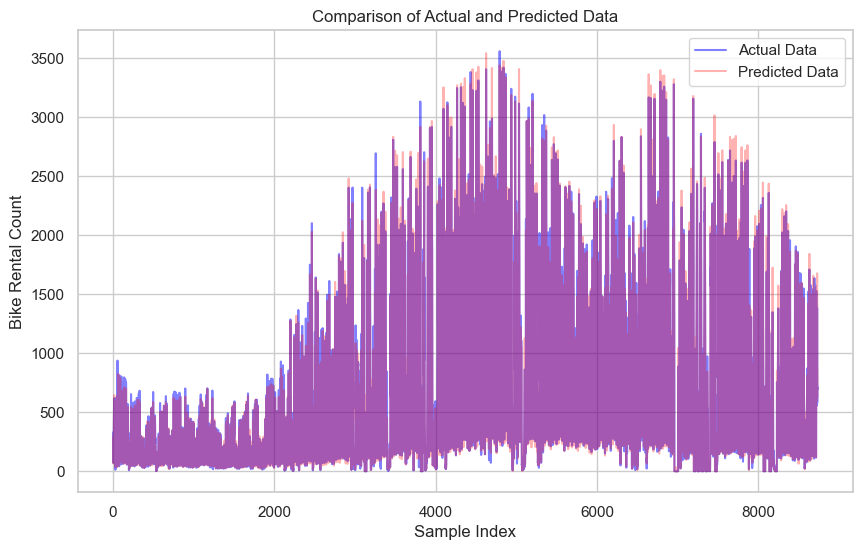

In [71]:

allPredict2 = best_model2.predict(allX2)

allPredict_transformed_back2 = scaler_y.inverse_transform(allPredict2)

allPredict_original2 = np.square(allPredict_transformed_back2)

y_all_original = seoulBike_data["Rented Bike Count"].values.reshape(-1,1)
look_back = 24

plt.figure(figsize=(10, 6))
plt.plot(y_all_original[look_back:].flatten(), label='Actual Data', color='blue', alpha=0.5)
plt.plot(allPredict_original2.flatten(), label='Predicted Data', color='red', alpha=0.3)
plt.title('Comparison of Actual and Predicted Data')
plt.xlabel('Sample Index')
plt.ylabel('Bike Rental Count')
plt.legend()
plt.show()

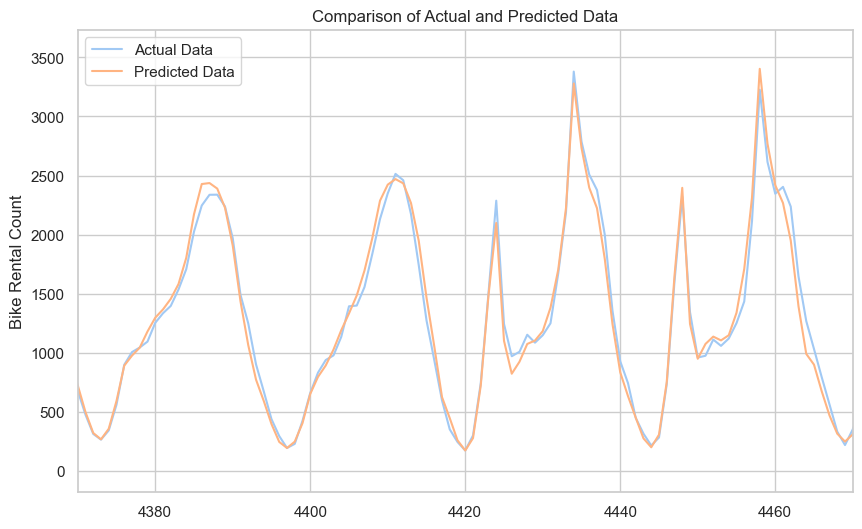

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(y_all_original[look_back:].flatten(), label='Actual Data')
plt.plot(allPredict_original2.flatten(), label='Predicted Data')
plt.title('Comparison of Actual and Predicted Data')
#plt.xlabel('Hourly time')
plt.ylabel('Bike Rental Count')
plt.legend()

plt.xlim(4370,4470)

plt.show()

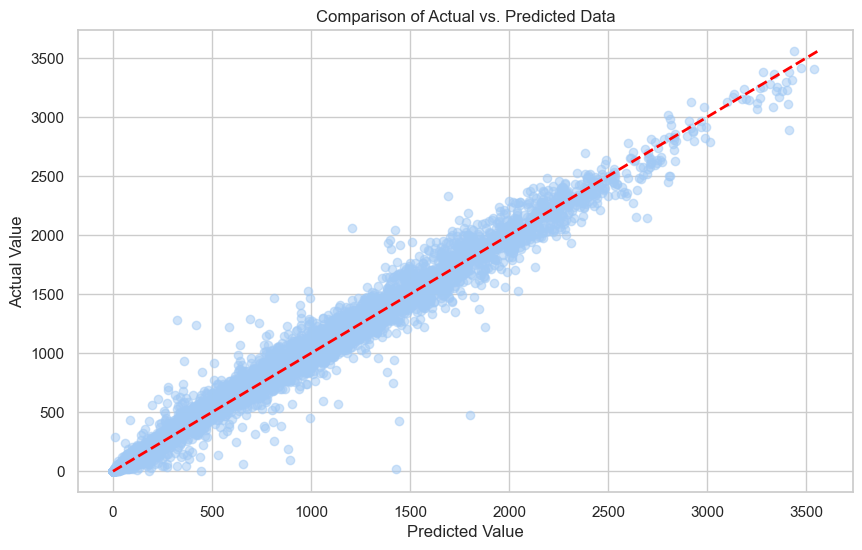

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(allPredict_original2, y_all_original[look_back:], alpha=0.5)
plt.title('Comparison of Actual vs. Predicted Data')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.plot([min(y_all_original[look_back:]), max(y_all_original[look_back:])], 
         [min(y_all_original[look_back:]), max(y_all_original[look_back:])], 
         color='red', linestyle='--', linewidth=2)

plt.show()


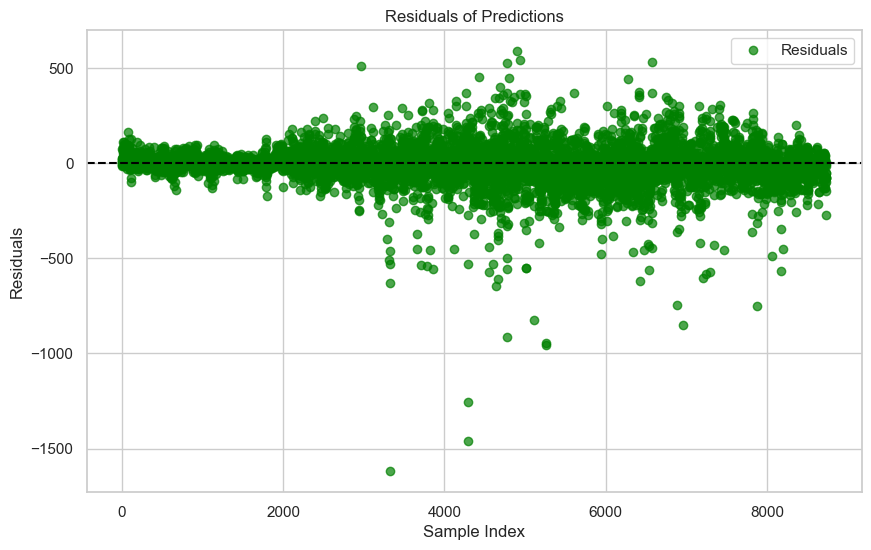

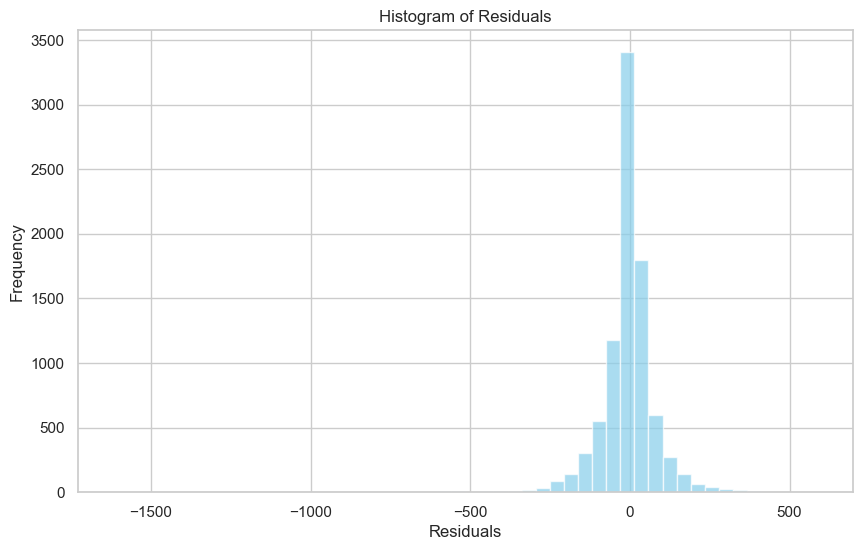

In [74]:
look_back = 24

y_all_original_adjusted = y_all_original[look_back:]

assert len(y_all_original_adjusted) == len(allPredict_original), "The adjusted original and predicted arrays do not match in length."

residuals = y_all_original_adjusted.flatten() - allPredict_original.flatten()

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='green', marker='o', linestyle='none', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')  
plt.title('Residuals of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [75]:
testPredict

array([[16.428078],
       [ 9.950111],
       [14.169264],
       ...,
       [29.72842 ],
       [30.78195 ],
       [14.485617]], dtype=float32)

### LSTM plot on testing set(testing set on time window, not the regression testing test)

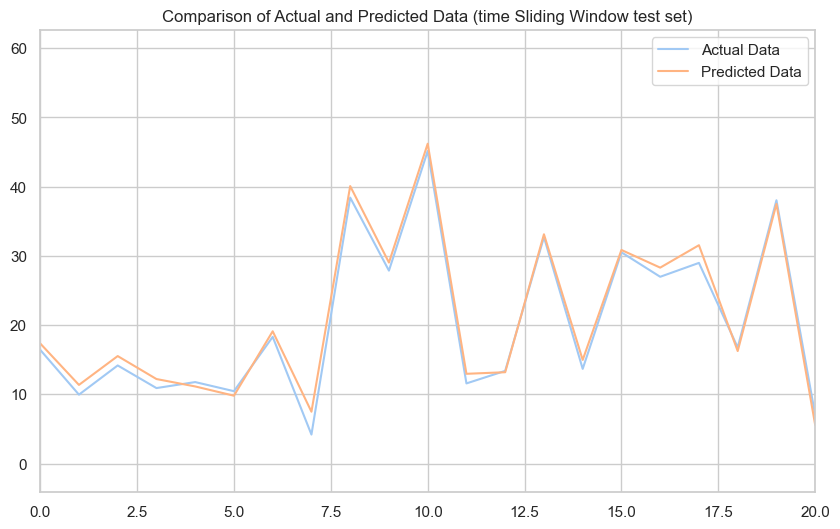

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(testPredict, label='Actual Data')
plt.plot(testY_inv, label='Predicted Data')
plt.title('Comparison of Actual and Predicted Data (time Sliding Window test set)')
# plt.xlabel('Sample Index')
# plt.ylabel('Bike Rental Count')
plt.legend()

plt.xlim(0,20)
plt.show()

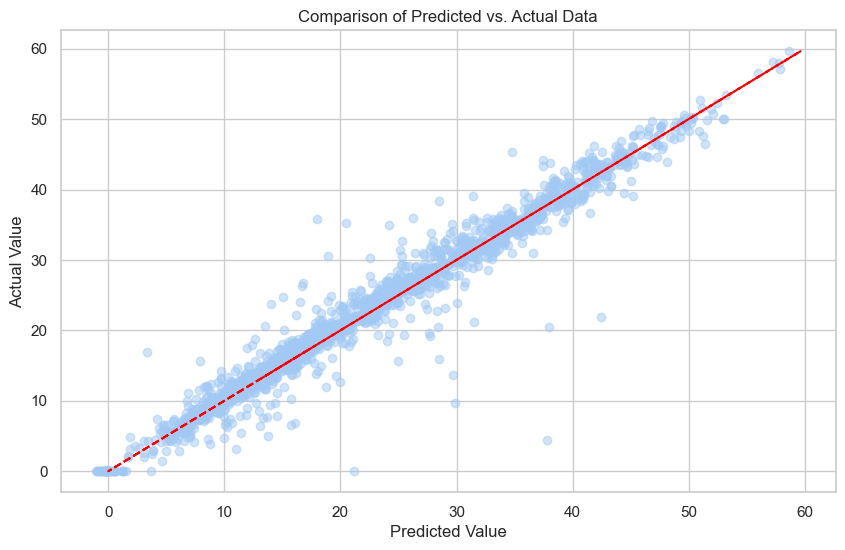

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(testPredict, testY_inv, alpha=0.5)
plt.title('Comparison of Predicted vs. Actual Data')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.plot(testY_inv, testY_inv, color='red', linestyle='--')


plt.show()